### **The Influence of Property Type on Booking Rates**
##### Airbnb Dataset Dictionary

| **Column Name**                                  | **Data Type** | **Description** |
|--------------------------------------------------|--------------|----------------|
| id                                              | bigint       | Unique identifier for the listing. |
| listing_url                                     | string       | URL of the Airbnb listing. |
| scrape_id                                       | bigint       | ID for the data scraping session. |
| last_scraped                                    | date         | Date when the data was last scraped. |
| source                                          | string       | Source of the data collection. |
| name                                            | string       | Title of the listing. |
| description                                     | string       | Detailed description of the listing. |
| neighborhood_overview                           | string       | Short description of the surrounding neighborhood. |
| picture_url                                     | string       | URL of the listing's main image. |
| host_id                                         | int          | Unique ID for the host. |
| host_url                                        | string       | URL of the host's profile. |
| host_name                                       | string       | Name of the host. |
| host_since                                      | date         | Date when the host joined Airbnb. |
| host_location                                   | string       | Location of the host. |
| host_about                                      | string       | Short bio of the host. |
| host_response_time                              | string       | Average response time of the host. |
| host_response_rate                              | string       | Percentage of messages responded to. |
| host_acceptance_rate                            | string       | Percentage of booking requests accepted. |
| host_is_superhost                               | string       | Whether the host is a Superhost (`t` = true, `f` = false). |
| host_thumbnail_url                              | string       | URL of the host’s profile thumbnail image. |
| host_picture_url                                | string       | URL of the host’s profile picture. |
| host_neighbourhood                              | string       | Neighborhood where the host is located. |
| host_listings_count                             | int          | Number of listings by the host. |
| host_total_listings_count                       | int          | Total number of listings across all platforms. |
| host_verifications                              | string       | Verification methods of the host. |
| host_has_profile_pic                            | string       | Whether the host has a profile picture. |
| host_identity_verified                          | string       | Whether the host has verified their identity. |
| neighbourhood                                   | string       | General neighborhood name. |
| neighbourhood_cleansed                          | string       | Standardized neighborhood name. |
| neighbourhood_group_cleansed                    | string       | Grouped version of neighborhoods. |
| latitude                                        | double       | Latitude coordinate of the listing. |
| longitude                                       | double       | Longitude coordinate of the listing. |
| property_type                                   | string       | Type of property (e.g., apartment, house, villa). |
| room_type                                       | string       | Type of room offered (e.g., entire home, private room). |
| accommodates                                    | int          | Maximum number of guests the listing can accommodate. |
| bathrooms                                       | string       | Number of bathrooms (often a string with extra details). |
| bathrooms_text                                  | string       | Text description of bathrooms (e.g., “1.5 shared bathrooms”). |
| bedrooms                                        | int          | Number of bedrooms. |
| beds                                            | int          | Number of beds available. |
| amenities                                       | string       | List of amenities available in the listing. |
| price                                           | string       | Price per night for the listing (as a string, needs conversion). |
| minimum_nights                                  | int          | Minimum number of nights required for a booking. |
| maximum_nights                                  | int          | Maximum number of nights allowed for a booking. |
| minimum_minimum_nights                          | int          | Minimum value across listings for min nights. |
| maximum_minimum_nights                          | int          | Maximum value across listings for min nights. |
| minimum_maximum_nights                          | int          | Minimum value across listings for max nights. |
| maximum_maximum_nights                          | int          | Maximum value across listings for max nights. |
| minimum_nights_avg_ntm                          | double       | Average minimum nights for nearby listings. |
| maximum_nights_avg_ntm                          | double       | Average maximum nights for nearby listings. |
| calendar_updated                                | string       | Frequency of calendar updates. |
| has_availability                                | string       | Whether the listing is currently available. |
| availability_30                                 | int          | Number of available days in the next 30 days. |
| availability_60                                 | int          | Number of available days in the next 60 days. |
| availability_90                                 | int          | Number of available days in the next 90 days. |
| availability_365                                | int          | Number of available days in the next 365 days. |
| calendar_last_scraped                           | date         | Date when the calendar was last updated. |
| number_of_reviews                              | int          | Total number of reviews received. |
| number_of_reviews_ltm                          | int          | Number of reviews in the last 12 months. |
| number_of_reviews_l30d                         | int          | Number of reviews in the last 30 days. |
| first_review                                   | date         | Date of the first review. |
| last_review                                    | date         | Date of the most recent review. |
| review_scores_rating                           | double       | Overall rating score (out of 100). |
| review_scores_accuracy                         | double       | Accuracy rating of the listing. |
| review_scores_cleanliness                      | double       | Cleanliness rating of the listing. |
| review_scores_checkin                          | double       | Check-in experience rating. |
| review_scores_communication                    | double       | Communication rating of the host. |
| review_scores_location                         | double       | Location rating of the listing. |
| review_scores_value                            | double       | Value-for-money rating. |
| license                                        | string       | License or registration number (if required). |
| instant_bookable                               | string       | Whether the listing can be instantly booked (`t` = true, `f` = false). |
| calculated_host_listings_count                 | int          | Number of listings managed by the host. |
| calculated_host_listings_count_entire_homes    | int          | Number of entire homes managed. |
| calculated_host_listings_count_private_rooms   | int          | Number of private rooms managed. |
| calculated_host_listings_count_shared_rooms    | int          | Number of shared rooms managed. |
| reviews_per_month                              | double       | Average number of reviews per month. |


Authors: <font color="green">Nathan Anjelo Aquino, Althea Grace Concha, John Sigfred Tapican</font>

#### Import Libraries

In [163]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib as mpl

# Display formatting
from tabulate import tabulate

# Spatial and distance calculations
from scipy.spatial.distance import pdist, squareform

# PySpark
from pyspark.sql import functions as F
from pyspark.sql.functions import (
    count, when, mean, sum, col, lit, expr, regexp_replace, regexp_extract,
    round, year, current_date, datediff, to_date, format_number, explode,
    split, trim, desc, udf
)
from pyspark.sql.types import StringType, NumericType, BooleanType
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

# Machine Learning - sklearn
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, classification_report,
    mean_absolute_error, mean_squared_error
)

# Oversampling for imbalance handling
from imblearn.over_sampling import SMOTE

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

<font color="#154360" style="font-size:26px;"><b>📌 Data Import and Exploration</b></font>

The analysis begins with importing the listings.csv dataset into a PySpark DataFrame through this section. Data loading procedures adopt methods to preserve data integrity through correct handling of both quoted data values, escape sequences, and multiple line text entries. The first five records within the dataset get shown to display its basic arrangement and textual content.

In [164]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PropertyData").getOrCreate()
# Load the CSV file into a PySpark DataFrame
df = spark.read.option("quote", '"') \
               .option("escape", '"') \
               .option("multiLine", "true") \
               .option("header", "true") \
               .option("inferSchema", "true") \
               .csv("listings.csv")

df.show(5, truncate=False)

+------+-----------------------------------+--------------+------------+-----------+-------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<font color="#154360" style="font-size:26px;"><b>📌 Identifying Data and Attributes</b></font>

The dataset presents comprehensive details about Airbnb listings by providing information about properties and hosts together with prices and booking availability and guest feedback. The data attributes display the following breakdown with their specified data types.

In [165]:
for col_name, data_type in df.dtypes:
    print(f"{col_name}: {data_type}")

id: bigint
listing_url: string
scrape_id: bigint
last_scraped: date
source: string
name: string
description: string
neighborhood_overview: string
picture_url: string
host_id: int
host_url: string
host_name: string
host_since: date
host_location: string
host_about: string
host_response_time: string
host_response_rate: string
host_acceptance_rate: string
host_is_superhost: string
host_thumbnail_url: string
host_picture_url: string
host_neighbourhood: string
host_listings_count: int
host_total_listings_count: int
host_verifications: string
host_has_profile_pic: string
host_identity_verified: string
neighbourhood: string
neighbourhood_cleansed: string
neighbourhood_group_cleansed: string
latitude: double
longitude: double
property_type: string
room_type: string
accommodates: int
bathrooms: string
bathrooms_text: string
bedrooms: int
beds: int
amenities: string
price: string
minimum_nights: int
maximum_nights: int
minimum_minimum_nights: int
maximum_minimum_nights: int
minimum_maximum_night

<font color="#154360" style="font-size:26px;"><b>📌 Determining the Type of Dataset</b></font>

To gain a better understanding of the dataset, the columns are categorized based on their data types. The dataset is examined to classify columns into numerical, categorical, or mixed-type variables. This classification helps in selecting appropriate preprocessing techniques for further analysis.

In [166]:
# Initialize category groups
numerical_cols = []
categorical_cols = []
mixed_cols = []

# Check each column's data type
for col_name, data_type in df.dtypes:
    if isinstance(df.schema[col_name].dataType, NumericType):
        numerical_cols.append(col_name)
    elif isinstance(df.schema[col_name].dataType, (StringType, BooleanType)):
        categorical_cols.append(col_name)
    else:
        mixed_cols.append(col_name)  # If it's neither pure numeric nor string

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Mixed Columns (if any):", mixed_cols)

Numerical Columns: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Categorical Columns: ['listing_url', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host

<font color="#154360" style="font-size:26px;"><b>📌 Data Quality Assessment</b></font>

Evaluating data quality stands essential for building reliable analysis because of its direct impact on future modeling insights. Every column should be inspected for missing data points while duplicate records need to be detected. Data quality assessment leads to improved accuracy of modeling results as well as maintaining data integrity standards.

In [167]:
# Count missing values per column
missing_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])

missing_counts.show(vertical=True)

-RECORD 0---------------------------------------------
 id                                           | 0     
 listing_url                                  | 0     
 scrape_id                                    | 0     
 last_scraped                                 | 0     
 source                                       | 0     
 name                                         | 0     
 description                                  | 659   
 neighborhood_overview                        | 15225 
 picture_url                                  | 0     
 host_id                                      | 0     
 host_url                                     | 0     
 host_name                                    | 3     
 host_since                                   | 3     
 host_location                                | 6212  
 host_about                                   | 16120 
 host_response_time                           | 3     
 host_response_rate                           | 3     
 host_acce

In [168]:
# Count duplicate rows
duplicate_count = df.count() - df.dropDuplicates().count()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


<font color="#516B2B" style="font-size:22px;"><b>Data Type Conversions for Specific Columns</b></font>

Proper numeric formats in numerical values serve as an essential requirement for carrying out successful analysis. Data scientists must transform essential columns containing `bathrooms` data as well as `price` information together with percentage values from `host_response_rate` and `host_acceptance_rate` into numeric formats. Text-based inconsistencies along with missing values receive treatment during this transformation which improves data consistency and enables subsequent analysis of the dataset

In [169]:
# Convert `bathrooms` to numeric (e.g., handle "1 bath", "Shared bath")
df = df.withColumn("bathrooms", regexp_replace(col("bathrooms"), "[^0-9.]", "").cast("double"))

# Convert `price` to numeric (remove "$" and commas)
df = df.withColumn("price", regexp_replace(col("price"), "[$,]", "").cast("double"))

# Convert percentage columns to numeric
df = df.withColumn("host_response_rate", regexp_replace(col("host_response_rate"), "%", "").cast("double"))
df = df.withColumn("host_acceptance_rate", regexp_replace(col("host_acceptance_rate"), "%", "").cast("double"))

In [170]:
#bathrooms_text_values = df.select("bathrooms_text").distinct().rdd.flatMap(lambda x: x).collect()

In [171]:
# Extract and round numeric part for bathrooms
df = df.withColumn("bathrooms", 
    when(col("bathrooms_text").rlike(r"(\d+\.?\d*)"), 
         round(regexp_extract(col("bathrooms_text"), r"(\d+\.?\d*)", 1).cast("double")))
    .when(col("bathrooms_text").rlike("Half-bath|Private half-bath|Shared half-bath"), 1)  # Assign 1 for half/shared baths
    .otherwise(1)  # Default to 1 for shared baths with no number
)

# Keep original text format in bathrooms_text
df = df.withColumn("bathrooms_text", 
    when(col("bathrooms_text").isNotNull(), col("bathrooms_text"))
    .otherwise("Unknown")  # Handle missing values
)

# Show results
df.select("bathrooms", "bathrooms_text").show()

+---------+--------------+
|bathrooms|bathrooms_text|
+---------+--------------+
|      1.0|        1 bath|
|      1.0|       Unknown|
|      1.0|        1 bath|
|      1.0|        1 bath|
|      1.0|        1 bath|
|      2.0|       2 baths|
|      1.0|        1 bath|
|      2.0|     1.5 baths|
|      1.0|        1 bath|
|      7.0|       7 baths|
|      3.0|       3 baths|
|      3.0|       3 baths|
|      1.0|        1 bath|
|      1.0|        1 bath|
|      2.0|     1.5 baths|
|      1.0|        1 bath|
|      4.0|       4 baths|
|      3.0|     2.5 baths|
|      1.0| 1 shared bath|
|      2.0|       2 baths|
+---------+--------------+
only showing top 20 rows



<font color="#516B2B" style="font-size:22px;"><b>Impute Missing Values Based on Column Category</b></font>

Data imputation follows column-type protocols to both maintain consistency and complete data across the datasets:
- **Numerical columns**: Missing values are replaced with the median, as it is less sensitive to outliers.
- **Categorical columns**: Missing values are replaced with the mode (most frequently occurring value) when available.
- **Mixed-type columns**: These require further examination, as they contain date-related information or inconsistent data types. <br>

Analysis results show that the Mode function identifies no suitable mode in three categorical data fields (description, host_about, neighbourhood) because of random or inconsistent variations. Because the last_scraped and first_review columns combine categorical and time data types they need unique processing for date normalization.

In [172]:
# For numerical columns: impute missing values with the median.
for col_name in numerical_cols:
    median_val = df.approxQuantile(col_name, [0.5], 0.05)
    if median_val and len(median_val) > 0:
        df = df.fillna({col_name: median_val[0]})
    else:
        print(f"Skipping numerical column {col_name}: No quantile available")

# For categorical columns: impute missing values with the mode (most frequent value).
for col_name in categorical_cols:
    mode_row = df.groupBy(col_name).count().orderBy(desc("count")).first()
    if mode_row and mode_row[col_name] is not None:
        df = df.fillna({col_name: mode_row[col_name]})
    else:
        print(f"Skipping categorical column {col_name}: No mode found")

# For mixed columns, print them for further review.
print("Mixed columns that require special handling:", mixed_cols)

Skipping categorical column description: No mode found
Skipping categorical column neighborhood_overview: No mode found
Skipping categorical column host_about: No mode found
Skipping categorical column host_neighbourhood: No mode found
Skipping categorical column neighbourhood: No mode found
Skipping categorical column neighbourhood_group_cleansed: No mode found
Skipping categorical column calendar_updated: No mode found
Skipping categorical column license: No mode found
Mixed columns that require special handling: ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']


<font color="#516B2B" style="font-size:22px;"><b>Additional Data Wrangling & Feature Engineering</b></font>

In enhancing data usability and interpretability, the dataset undergoes **feature transformation**, including categorization, outlier capping, and additional variable derivations:  

- **Discretization**:  
  - `price` is categorized into **Low, Medium, High, and Luxury** tiers.  
  - `accommodates` is grouped into **Small, Medium, and Large** categories.  
  - `review_scores_rating` is binned into **Low, Medium, and High** groups.  

- **Outlier Treatment**:  
  - Extreme values in `minimum_nights`, `maximum_nights`, and `accommodates` are capped to **reasonable thresholds** to prevent distortions in analysis.  
  - `review_scores_rating` is capped at **5**, ensuring consistency in rating values.  

- **New Feature Derivations**:  
  - `host_age` is calculated based on **host_since** to analyze how long the host has been active.  
  - `is_superhost` is converted into a **binary indicator** (1 for superhosts, 0 otherwise).  
  - `total_availability` aggregates **availability_30, availability_60, and availability_90** to provide a holistic measure of listing availability.  

**Numerical and Categorical columns** are identified, and a **filtered dataset (PTBR_df)** is created, selecting key metrics relevant to the study.

In [173]:
# Discretize price into categories.
df = df.withColumn("price_category",
                   when(col("price") < 50, "Low")
                   .when((col("price") >= 50) & (col("price") < 150), "Medium")
                   .when((col("price") >= 150) & (col("price") < 300), "High")
                   .otherwise("Luxury"))

In [174]:
# Create an 'accommodates' category.
df = df.withColumn("accommodates_category",
                   when(col("accommodates") <= 2, "Small")
                   .when((col("accommodates") > 2) & (col("accommodates") <= 4), "Medium")
                   .otherwise("Large"))

In [175]:
# Discretize review_scores_rating into categories.
df = df.withColumn("review_category",
                   when(col("review_scores_rating") < 3, "Low")
                   .when((col("review_scores_rating") >= 3) & (col("review_scores_rating") < 4.5), "Medium")
                   .otherwise("High"))

In [176]:
# Cap outlier values for some numeric fields.
df = df.withColumn("minimum_nights", when(col("minimum_nights") > 365, 365).otherwise(col("minimum_nights")))
df = df.withColumn("maximum_nights", when(col("maximum_nights") > 365, 365).otherwise(col("maximum_nights")))
df = df.withColumn("accommodates", when(col("accommodates") > 10, 10).otherwise(col("accommodates")))
df = df.withColumn("review_scores_rating", when(col("review_scores_rating") > 5, 5).otherwise(col("review_scores_rating")))

In [177]:
df = df.withColumn("host_age", year(current_date()) - year(col("host_since")))

In [178]:
# Convert host_is_superhost to a binary indicator.
df = df.withColumn("is_superhost", when(col("host_is_superhost") == "t", 1).otherwise(0))

In [179]:
# Derive total availability from multiple availability columns.
df = df.withColumn("total_availability", col("availability_30") + col("availability_60") + col("availability_90"))

In [180]:
# Count missing values per column
missing_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])

missing_counts.show(vertical=True)

-RECORD 0---------------------------------------------
 id                                           | 0     
 listing_url                                  | 0     
 scrape_id                                    | 0     
 last_scraped                                 | 0     
 source                                       | 0     
 name                                         | 0     
 description                                  | 659   
 neighborhood_overview                        | 15225 
 picture_url                                  | 0     
 host_id                                      | 0     
 host_url                                     | 0     
 host_name                                    | 0     
 host_since                                   | 3     
 host_location                                | 0     
 host_about                                   | 16120 
 host_response_time                           | 0     
 host_response_rate                           | 0     
 host_acce

In [181]:
# Get column types
column_types = dict(df.dtypes)

# Separate numerical and categorical columns
numerical_cols = [col for col, dtype in column_types.items() if dtype in ["int", "bigint", "double", "float", "decimal"]]
categorical_cols = [col for col, dtype in column_types.items() if dtype in ["string", "boolean"]]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'host_age', 'is_superhost', 'total_availability

In [182]:
key_metrics = ["property_type", "room_type", "accommodates", "bedrooms", "beds", "amenities", "bathrooms", "price", "minimum_nights", "maximum_nights",
    "availability_30","availability_60","availability_90","availability_365","number_of_reviews","reviews_per_month","review_scores_rating",
    "review_scores_accuracy","review_scores_cleanliness","review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value",
    "neighbourhood_cleansed", "host_is_superhost", "host_listings_count","host_identity_verified", "longitude", "latitude"]

# Create PTBR_df by selecting the same key metrics
PTBR_df = df.select([F.col(c) for c in key_metrics])
PTBR_df.printSchema()

root
 |-- property_type: string (nullable = false)
 |-- room_type: string (nullable = false)
 |-- accommodates: integer (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- amenities: string (nullable = false)
 |-- bathrooms: double (nullable = false)
 |-- price: double (nullable = false)
 |-- minimum_nights: integer (nullable = true)
 |-- maximum_nights: integer (nullable = true)
 |-- availability_30: integer (nullable = true)
 |-- availability_60: integer (nullable = true)
 |-- availability_90: integer (nullable = true)
 |-- availability_365: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- reviews_per_month: double (nullable = false)
 |-- review_scores_rating: double (nullable = false)
 |-- review_scores_accuracy: double (nullable = false)
 |-- review_scores_cleanliness: double (nullable = false)
 |-- review_scores_checkin: double (nullable = false)
 |-- review_scores_communication: double (nullable = fa

<font color="#154360" style="font-size:26px;"><b>📌 Quantitative Statistics</b></font>

Analysis results show that the Mode function identifies no suitable mode in three categorical data fields (description, host_about, neighbourhood) because of random or inconsistent variations. Because the last_scraped and first_review columns combine categorical and time data types they need unique processing for date normalization.

In [183]:
# Convert to Pandas for visualization
PTBR_pd = PTBR_df.toPandas()

sns.set_style("whitegrid")

c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


In [184]:
PTBR_pd.dtypes

property_type                   object
room_type                       object
accommodates                     int32
bedrooms                         int32
beds                             int32
amenities                       object
bathrooms                      float64
price                          float64
minimum_nights                   int32
maximum_nights                   int32
availability_30                  int32
availability_60                  int32
availability_90                  int32
availability_365                 int32
number_of_reviews                int32
reviews_per_month              float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
neighbourhood_cleansed          object
host_is_superhost               object
host_listings_count      

In [185]:
# Summary statistics for numerical features
numerical_summary = PTBR_pd.describe()
numerical_summary

,accommodates,bedrooms,beds,bathrooms,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listings_count,longitude,latitude
count,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,...,31964.000000,31964.00000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000
mean,3.962020,1.603116,2.499937,1.657146,819.913027,4.559504,236.673289,16.451133,33.953416,54.673883,...,4.790294,4.83446,4.774001,4.912325,4.901395,4.890012,4.726036,16.111125,-43.251361,-22.967574
std,2.072429,0.992780,2.197268,1.076606,6640.141788,18.043333,156.503945,11.989915,23.314947,33.898050,...,0.487230,0.34959,0.393540,0.281550,0.303437,0.281762,0.389019,89.078233,0.100595,0.035182
min,1.000000,1.000000,1.000000,0.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-43.723009,-23.073276
25%,2.000000,1.000000,1.000000,1.000000,196.000000,1.000000,60.000000,3.000000,10.000000,24.000000,...,4.800000,4.83000,4.750000,4.930000,4.920000,4.910000,4.700000,1.000000,-43.310047,-22.984820
50%,4.000000,1.000000,2.000000,1.000000,317.000000,2.000000,365.000000,19.000000,39.000000,65.000000,...,4.910000,4.93000,4.880000,5.000000,5.000000,4.970000,4.810000,2.000000,-43.195670,-22.972860
75%,5.000000,2.000000,3.000000,2.000000,600.000000,3.000000,365.000000,29.000000,58.000000,88.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.910000,5.000000,-43.185946,-22.956165
max,10.000000,26.000000,91.000000,30.000000,562031.000000,365.000000,365.000000,30.000000,60.000000,90.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,1311.000000,-43.104400,-22.749690


<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
- Most Airbnb properties serve groups of small sizes because the median stays at four guests and one bedroom. Most properties support short-term stays because their median minimum stay requirement amounts to two nights. The wide price variation among Airbnb listings results in 317 as median nightly rate while 819 represents the calculated mean which demonstrates luxury properties impact on overall averages. The exclusively expensive property listing at Most Airbnb properties serve groups of small sizes because the median stays at four guests and one bedroom. Most properties support short-term stays because their median minimum stay requirement amounts to two nights. The wide price variation among Airbnb listings results in 317 as median nightly rate while 819 represents the calculated mean which demonstrates luxury properties impact on overall averages. The exclusively expensive property listing at 562,031 suggests either an unusual data error or the availability of extravagant homes in the market. The majority of Airbnb listings maintain open availability during extended periods according to availability metrics since the median represents 174 days per year.  

- The guest reviews indicate positive satisfaction rates based on a median score of 4.91 out of 5 but zero ratings are observed for certain inactive listings. Properties differ in review count size from around 600 up to more than 600. The collected data reveals Airbnb hosts operate across all scales from small scale to large scale management with one host maintaining 1,311 properties being the maximum observed. The wide standard deviation between listings suggests that independent and corporate property management companies both participate in the Airbnb platform. Analysis shows the market contains intense competition among properties including different types of properties that use multiple pricing strategies operated by varied host management approaches 562,031 suggests either an unusual data error or the availability of extravagant homes in the market. The majority of Airbnb listings maintain open availability during extended periods according to availability metrics since the median represents 174 days per year.  


<font color="#516B2B" style="font-size:22px;"><b>Transformation</b></font>

The dataset needs data transformation as a fundamental step before analysis to maintain consistency and accuracy alongside enhancing usability. Data transformation requires variables to get proper formats along with handling missing values while standardizing numerical features and generating new derived features for improved predictive capability.

c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


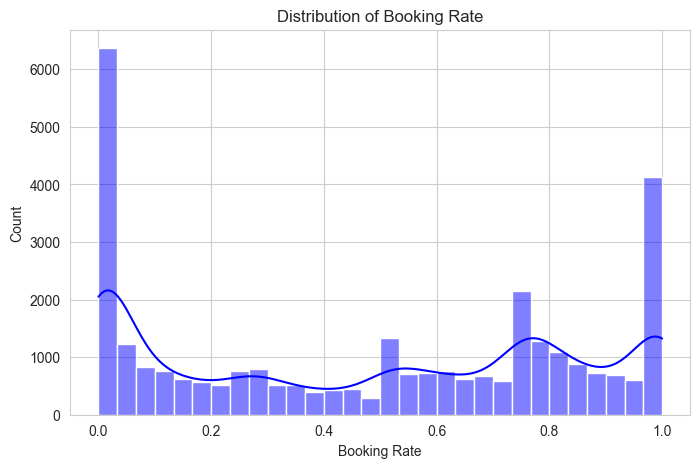

In [186]:
# Create booking_rate column
PTBR_df = PTBR_df.withColumn("booking_rate", (365 - F.col("availability_365")) / 365)
PTBR_pd = PTBR_df.toPandas()  

# Plot histogram of booking rate
plt.figure(figsize=(8, 5))
sns.histplot(data=PTBR_pd, x="booking_rate", bins=30, kde=True, color="blue")

plt.title("Distribution of Booking Rate")
plt.xlabel("Booking Rate")
plt.ylabel("Count")
plt.show()

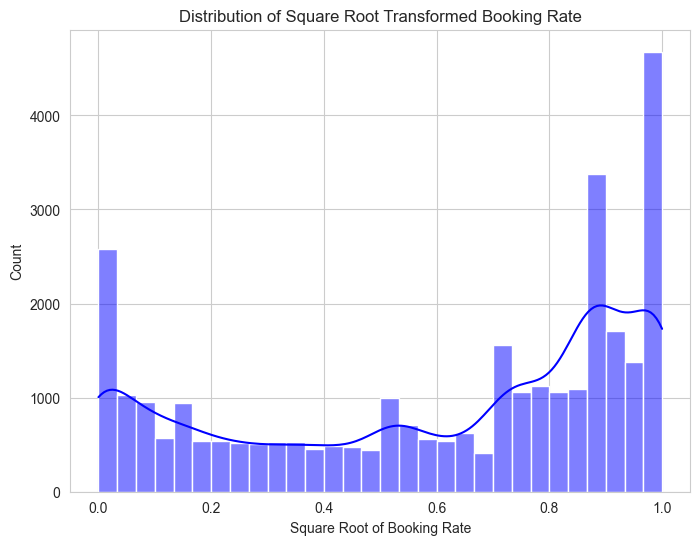

In [187]:
# Apply square root transformation directly to the 'booking_rate' column
PTBR_pd["booking_rate"] = np.sqrt(PTBR_pd["booking_rate"])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.title("Distribution of Square Root Transformed Booking Rate")
sns.histplot(PTBR_pd["booking_rate"], bins=30, kde=True, color="blue")  # No need for _sqrt suffix
plt.xlabel("Square Root of Booking Rate")
plt.ylabel("Count")
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
- Transforming **Booking Rate** data by square root effectively reduces its skewness without changing its overall U-shape pattern. Most properties show rising booking rates according to the distribution's slight left skew which demonstrates higher frequency of values near 1 compared to 0. The middle range of the transformed data becomes more uniform while the left skew signifies that properties booking rates are concentrated toward higher values thus affecting both pricing strategies and property demand assessment.

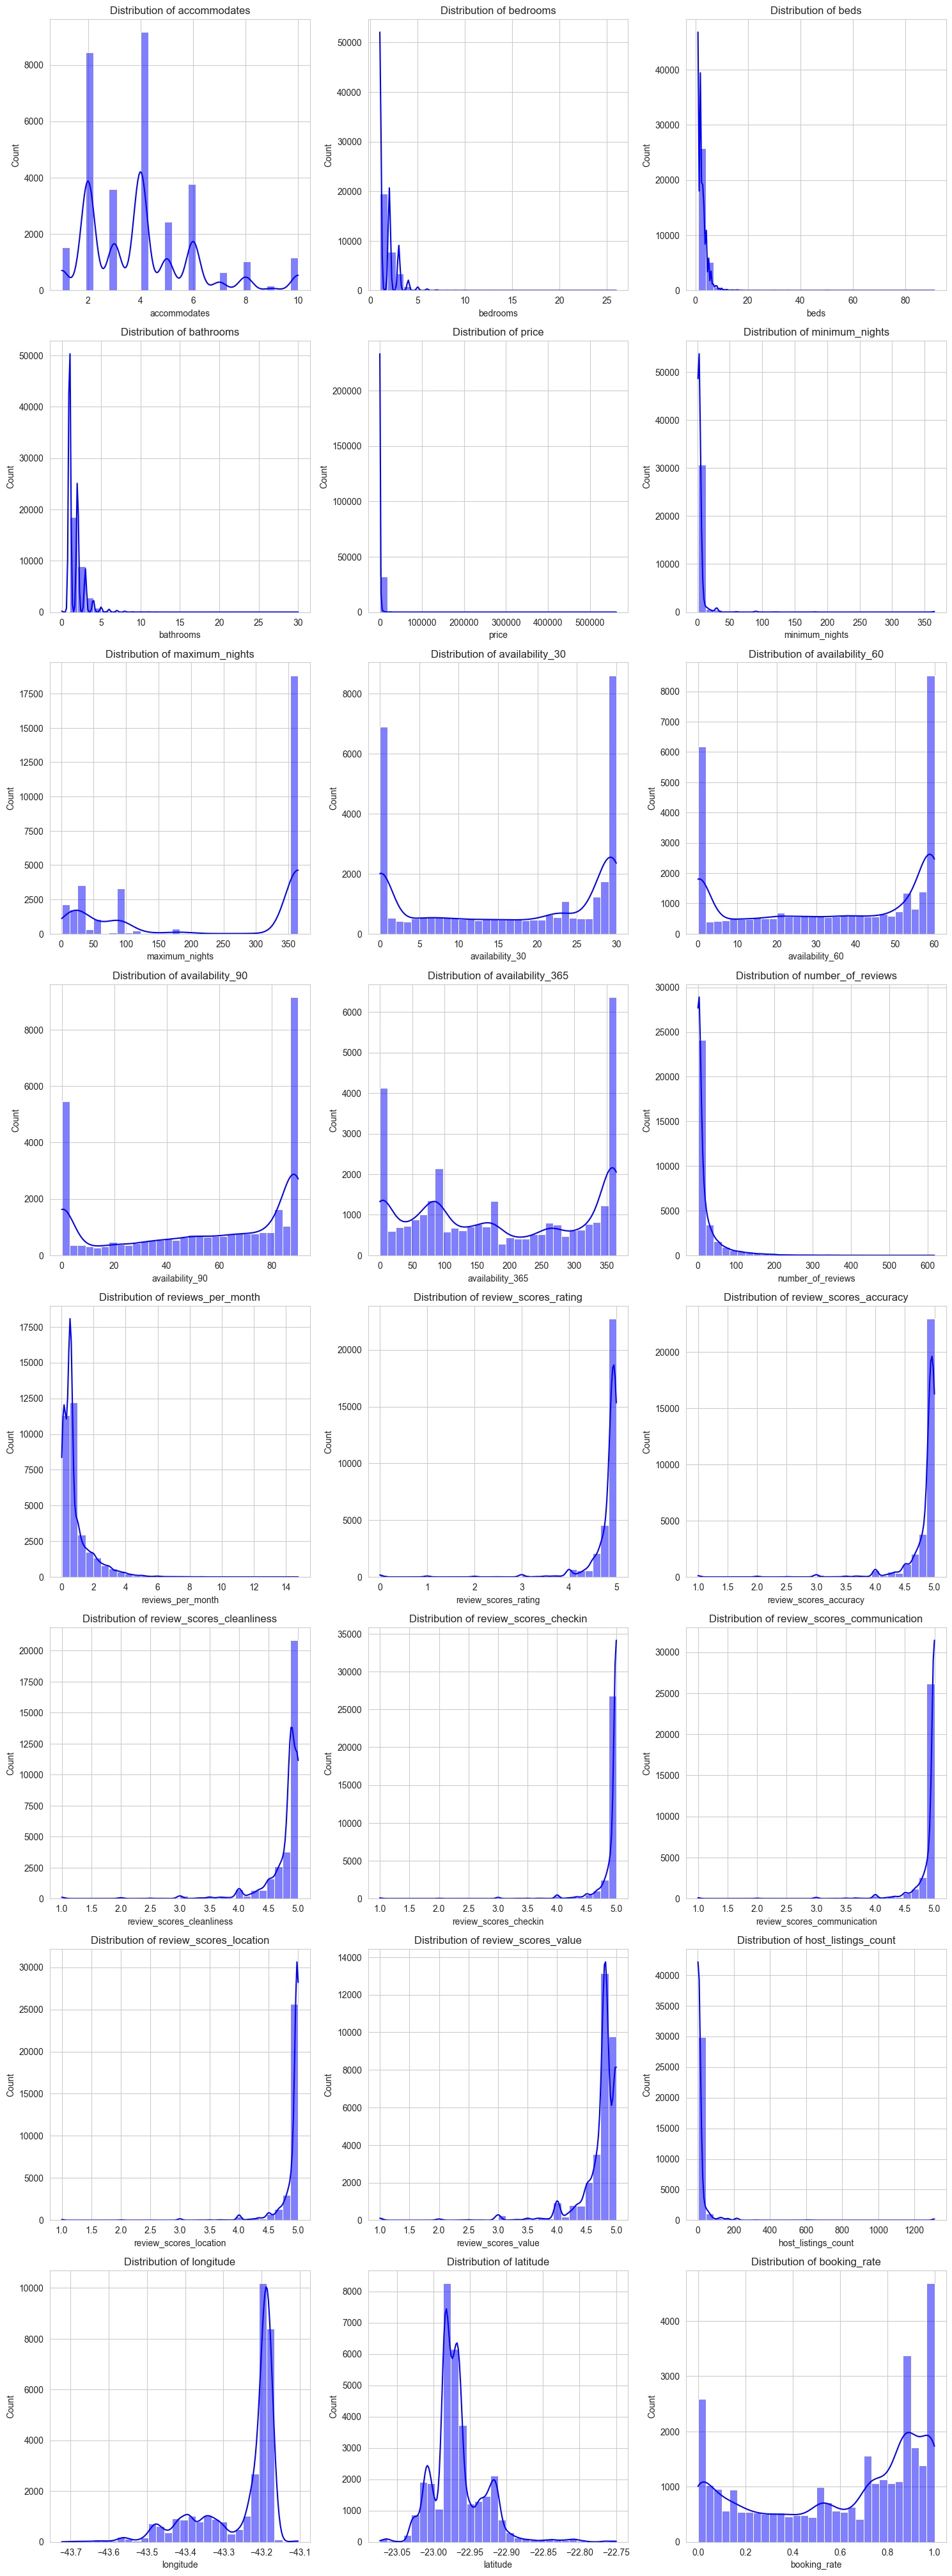

In [188]:
# Select only numeric columns
numeric_cols = PTBR_pd.select_dtypes(include=['float64', 'int32', 'int64'])

# Set up subplots
num_cols = len(numeric_cols.columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], bins=30, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>
  
- The distribution plots expose fundamental information about numerical elements of the dataset. The distribution data shows that most variables appear right-skewed because they contain dense values in the lower ranges followed by extensive tails that reach higher values. The variables of price, number of reviews, reviews per month and host listings count display notable right-skewness because they contain extreme outlier values and a few very high records. The analysis indicates that only a minority of listings possess extraordinarily high prices or extensive review counts although the rest of the listings tend to be priced at lower levels. The count of bedrooms, beds and bathrooms follows unequal distributions because most properties contain a limited number of these features but some listings possess unusually large quantities.

- Three properties availability variables known as availability_30, availability_60 and availability_365 feature dual patterns that demonstrate extensive availability or complete unavailability throughout the year. The review_scores_rating variable follows a left-skewed distribution since most hosts achieve 5-star ratings which demonstrates that hosts receive predominantly positive reviews. The presence of extreme values together with skewed distributions in multiple features indicates that log transformation or normalization would improve predictive modeling effectiveness and statistical analysis precision.

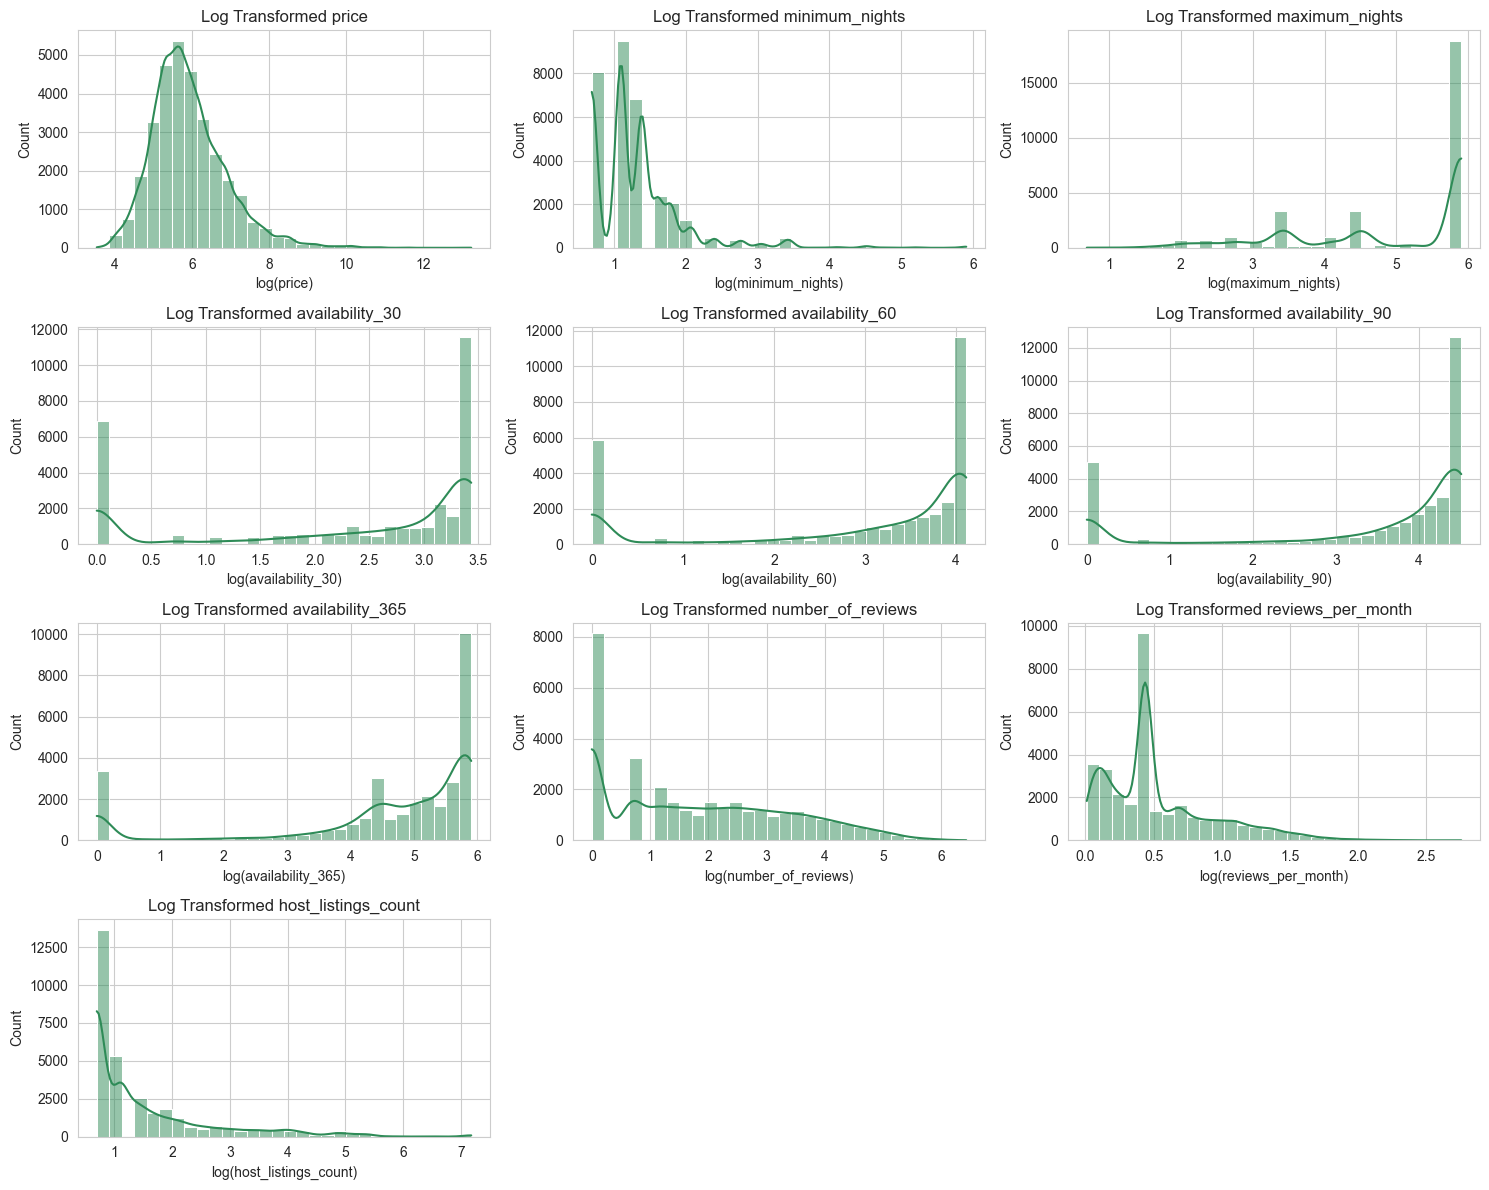

In [189]:
# Create a copy of the DataFrame before transformation
PTBR_pd_original = PTBR_pd.copy()

# List of columns to transform
columns_to_transform = [
    "price", "minimum_nights", "maximum_nights",
    "availability_30", "availability_60", "availability_90", "availability_365",
    "number_of_reviews", "reviews_per_month", "host_listings_count"
]

# Apply log1p transformation (log(1 + x) to avoid log(0) issue) and overwrite the columns
PTBR_pd[columns_to_transform] = PTBR_pd[columns_to_transform].apply(np.log1p)

plt.figure(figsize=(15, 12))
sns.set_style("whitegrid")

for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(4, 3, i)
    sns.histplot(PTBR_pd[col], bins=30, kde=True, color="#2E8B57")  # No need for _log suffix
    plt.title(f"Log Transformed {col}")
    plt.xlabel(f"log({col})")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
- Through log transformation the original skewed variables achieve better distribution symmetry that approaches normal distribution behavior. The price variable started with strong right-skewed distribution but became more bell-shaped since it received the log transformation which reduced the influence of extreme outlier data points. The transformation process improved distribution shape for **number_of_reviews** together with **reviews_per_month** because both variables exhibited improved distribution symmetry while reducing their long-tailed concentration at the lower end. The data becomes more effective through transformation because it produces improved linear relationships while decreasing heteroscedasticity.

- The variables availability_30, availability_60, availability_90, and availability_365 maintain their bimodal distribution patterns due to numerous listings containing extreme availability values. The log transformation helps normalize distribution spread yet leaves undisturbed patterns which indicate that different data transformation methods including category assignment or outlier elimination techniques should be applied. The implementation of log transformation creates an efficient method to prep data for modeling purposes when dealing with heavy-tailed distributed variables.

<font color="#516B2B" style="font-size:22px;"><b>Exploratory Data Analysis</b></font>

In [190]:
property_to_group = {
    # ----------------------- Residential/Standard Housing -----------------------
    "Private room in loft": "Residential/Standard Housing",
    "Entire rental unit": "Residential/Standard Housing",
    "Shared room": "Residential/Standard Housing",
    "Private room in condo": "Residential/Standard Housing",
    "Private room in home": "Residential/Standard Housing",
    "Entire place": "Residential/Standard Housing",  
    "Floor": "Residential/Standard Housing",
    "Private room in rental unit": "Residential/Standard Housing",
    "Shared room in condo": "Residential/Standard Housing",
    "Shared room in home": "Residential/Standard Housing",
    "Private room": "Residential/Standard Housing",
    "Entire loft": "Residential/Standard Housing",
    "Shared room in loft": "Residential/Standard Housing",
    "Private room in townhouse": "Residential/Standard Housing",
    "Shared room in townhouse": "Residential/Standard Housing",
    "Entire townhouse": "Residential/Standard Housing",
    "Entire condo": "Residential/Standard Housing",
    "Shared room in rental unit": "Residential/Standard Housing",
    "Entire home": "Residential/Standard Housing",

    # ----------------------- Hospitality (Hotel-Like) -----------------------
    "Shared room in hostel": "Hospitality (Hotel-Like)",
    "Room in boutique hotel": "Hospitality (Hotel-Like)",
    "Room in bed and breakfast": "Hospitality (Hotel-Like)",
    "Entire guesthouse": "Hospitality (Hotel-Like)",
    "Entire guest suite": "Hospitality (Hotel-Like)",
    "Private room in guest suite": "Hospitality (Hotel-Like)",
    "Shared room in serviced apartment": "Hospitality (Hotel-Like)",
    "Room in hostel": "Hospitality (Hotel-Like)",
    "Room in hotel": "Hospitality (Hotel-Like)",
    "Private room in bed and breakfast": "Hospitality (Hotel-Like)",
    "Entire bed and breakfast": "Hospitality (Hotel-Like)",
    "Entire serviced apartment": "Hospitality (Hotel-Like)",
    "Private room in serviced apartment": "Hospitality (Hotel-Like)",
    "Shared room in hotel": "Hospitality (Hotel-Like)",
    "Shared room in guest suite": "Hospitality (Hotel-Like)",
    "Shared room in guesthouse": "Hospitality (Hotel-Like)",
    "Room in serviced apartment": "Hospitality (Hotel-Like)",
    "Private room in guesthouse": "Hospitality (Hotel-Like)",
    "Shared room in bed and breakfast": "Hospitality (Hotel-Like)",
    "Private room in resort": "Hospitality (Hotel-Like)",

    # ----------------------- Vacation Homes / Traditional STR -----------------------
    "Entire chalet": "Vacation Homes/Traditional STR",
    "Private room in chalet": "Vacation Homes/Traditional STR",
    "Entire cabin": "Vacation Homes/Traditional STR",
    "Private room in bungalow": "Vacation Homes/Traditional STR",
    "Entire vacation home": "Vacation Homes/Traditional STR",
    "Private room in cottage": "Vacation Homes/Traditional STR",
    "Entire townhouse": "Residential/Standard Housing",  
    "Entire villa": "Vacation Homes/Traditional STR",
    "Private room in cabin": "Vacation Homes/Traditional STR",
    "Shared room in vacation home": "Vacation Homes/Traditional STR",
    "Private room in villa": "Vacation Homes/Traditional STR",
    "Entire cottage": "Vacation Homes/Traditional STR",
    "Private room in vacation home": "Vacation Homes/Traditional STR",
    "Shared room in villa": "Vacation Homes/Traditional STR",
    "Entire bungalow": "Vacation Homes/Traditional STR",
    "Shared room in bungalow": "Vacation Homes/Traditional STR",

    # ----------------------- Unique Stays -----------------------
    "Private room in earthen home": "Unique Stays",
    "Earthen home": "Unique Stays",
    "Farm stay": "Unique Stays",
    "Shared room in tent": "Unique Stays",
    "Private room in casa particular": "Unique Stays",
    "Private room in nature lodge": "Unique Stays",
    "Ranch": "Unique Stays",
    "Camper/RV": "Unique Stays",
    "Private room in barn": "Unique Stays",
    "Castle": "Unique Stays",
    "Private room in boat": "Unique Stays",
    "Tiny home": "Unique Stays",
    "Shared room in casa particular": "Unique Stays",
    "Private room in treehouse": "Unique Stays",
    "Room in nature lodge": "Unique Stays",
    "Treehouse": "Unique Stays",
    "Private room in floor": "Residential/Standard Housing",  
    "Shared room in earthen home": "Unique Stays",
    "Private room in castle": "Unique Stays",
    "Shared room in boat": "Unique Stays",
    "Cycladic home": "Unique Stays",
    "Shared room in tiny home": "Unique Stays",
    "Boat": "Unique Stays",
    "Private room in tiny home": "Unique Stays",
    "Private room in farm stay": "Unique Stays",
    "Houseboat": "Unique Stays",
    "Casa particular": "Unique Stays",
    "Dome": "Unique Stays",
    "Shared room in nature lodge": "Unique Stays",
    "Barn": "Unique Stays",
    "Campsite": "Unique Stays"
}

<font color="#723680" style="font-size:22px;"><b>🏨 Property & Room Details</b></font>

In [191]:
# Map the "property_type" in PTBR_pd to a new column
PTBR_pd["stay_classification"] = (
    PTBR_pd["property_type"]
    .map(property_to_group)
    .fillna("Residential / Standard Housing")  
)

# Verify the new column
# print(PTBR_pd[["property_type", "high_level_group"]])

C:\Users\althe\AppData\Local\Temp\ipykernel_13748\2922241417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=PTBR_pd, x="stay_classification", y="price", palette="YlGnBu")


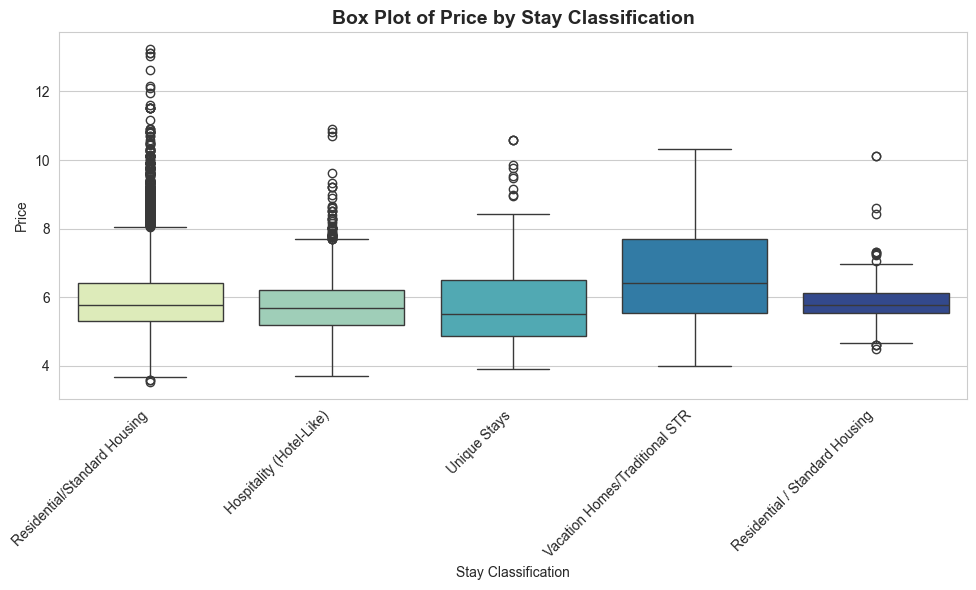

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=PTBR_pd, x="stay_classification", y="price", palette="YlGnBu")

plt.title("Box Plot of Price by Stay Classification", fontsize = 14, fontweight = "bold")
plt.xlabel("Stay Classification")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  

> *Note: Price values were log-transformed to improve visibility by minimizing the impact of extreme outliers.*

1. **Vacation Homes / Traditional STR have the highest median price**  
- This group (which includes villas, cottages, bungalows, etc.) shows a higher central value compared to other categories.  
- These properties are often larger, more private, and catered to group/family stays or luxury travelers—justifying the higher pricing.  
- It also has the widest interquartile range (IQR), indicating more price variability depending on property type, location, or amenities.

2. **Residential / Standard Housing and Hospitality (Hotel-Like) have similar price medians**  
- Despite being two distinct types, both show a comparable median (around mid-range on the transformed scale).  
- Residential units may offer comfort in home-like settings, while hotel-like options provide consistent service but may be smaller in size.  
- Residential listings also show more outliers—suggesting some properties (like full homes in prime areas) are priced far above average.

3. **Unique Stays fall between Hospitality and Vacation Homes**  
- Includes treehouses, farm stays, tiny homes, boats, etc.—priced lower than vacation homes but often above hospitality listings.  
- Their novelty allows for a wide pricing range, depending on uniqueness and features.  
- A broader IQR highlights pricing flexibility and the niche nature of these listings.

4. **Price dispersion is largest in Residential and Vacation Homes**  
- These two categories show many higher-end outliers, pointing to properties with premium features or prime locations.  
- This spread emphasizes the variety of listing types within these broad categories.

5. **Hospitality group has the most compact pricing distribution**  
- Hotel-like accommodations cluster tightly around the median.  
- This consistency reflects market-driven standardization, possibly due to professional management and guest expectations.

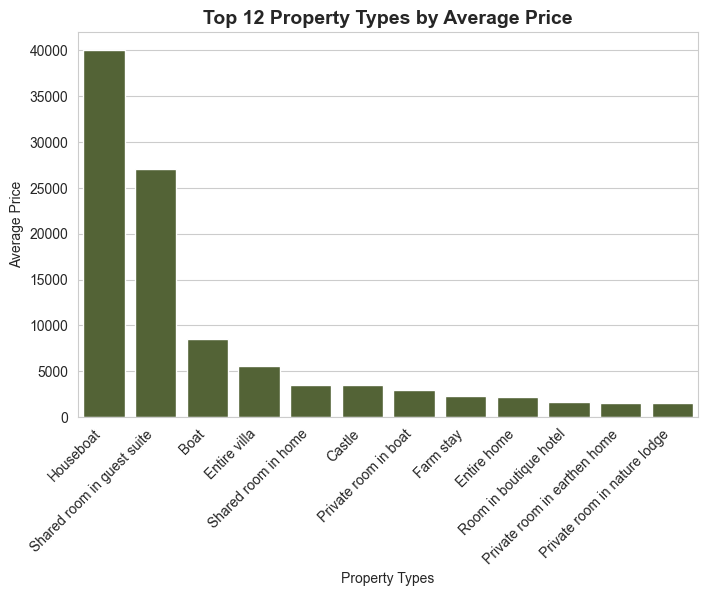

In [193]:
property_price_avg = PTBR_pd_original.groupby("property_type")["price"].mean().reset_index()

# Sort by highest average price and select top 5
top_n = 12
property_price_avg = property_price_avg.sort_values(by="price", ascending=False).head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(x=
"property_type", y="price", data=property_price_avg, color = "#556B2E")
plt.xticks(rotation=45, ha="right") 
plt.title(f"Top {top_n} Property Types by Average Price", fontsize =14, fontweight = "bold")
plt.xlabel("Property Types")
plt.ylabel("Average Price")
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

> *Note: Price data has been log-transformed for clarity due to extreme outliers.*

1. **Houseboats stand out with the highest average (log) price**  
   - Positioned as premium or novelty stays, likely due to their unique experience and limited availability.

2. **Shared rooms in guest suites surprisingly rank second**  
   - May reflect luxury-tier properties offering shared spaces within upscale homes, skewing the average higher.

3. **Boats and unique villas follow closely**  
   - These properties blend comfort with novelty, appealing to travelers who prefer experience-based accommodations.

4. **Mid-tier performers include castles, farm stays, and private/shared rooms in homes**  
   - While generally more affordable, these offer character, charm, or a countryside feel.

5. **Nature lodges and earthen homes rank lowest in average (log) price**  
   - These are often budget-friendly or eco-conscious options with more modest amenities.

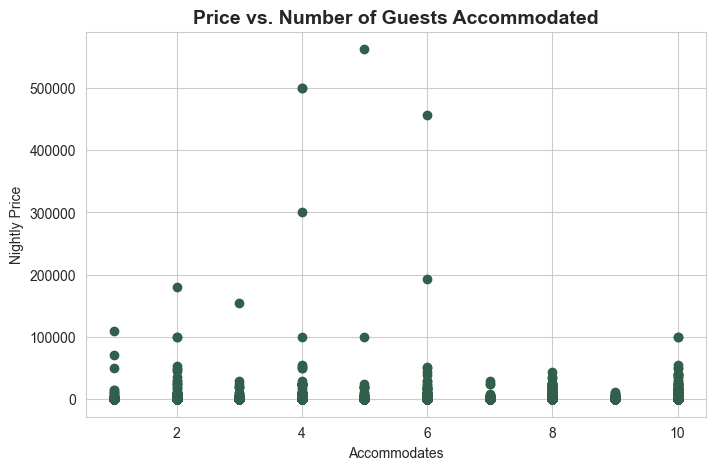

In [194]:
# Plot scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(PTBR_pd_original["accommodates"], PTBR_pd_original["price"], color = '#315f4c')
plt.title("Price vs. Number of Guests Accommodated", fontsize =14, fontweight = "bold")
plt.xlabel("Accommodates")
plt.ylabel("Nightly Price")
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

> *Note: Extreme values suggest a few luxury listings significantly skew the upper range.*

1. **Prices Don’t Always Scale with Guest Capacity**  
   - Listings for 1 to 10 guests often fall within similar price ranges, suggesting that simply offering space for more people doesn’t guarantee higher prices.

2. **Luxury Outliers Across All Sizes**  
   - Even listings for just 1 or 2 guests can have very high prices—possibly luxury apartments, exclusive villas, or properties in premium locations.

3. **Majority Stay Within an Affordable Range**  
   - Most listings are priced at modest levels regardless of how many people they accommodate, showing strong competition and pricing strategy aimed at accessibility.

4. **Slight Price Increase Then Plateau**  
   - Prices tend to rise slightly up to around 5–6 guests, but flatten out beyond that, possibly due to market limits or group discounts for larger properties.

In [195]:
# Check for null values in the amenities column
null_count = df.filter(df['amenities'].isNull()).count()
print(f"Number of null values in amenities: {null_count}")
df.select('amenities').show(3, truncate=False,vertical=True)

Number of null values in amenities: 0
-RECORD 0--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 amenities | ["Hangers", "Body soap", "Elevator", "Bed linens", "Microwave", "Wifi", "Dishes and silverware", "Hair dryer", "TV", "Iron", "Dining table", "Ceiling fan", "Essentials", "Public or shared beach access \u2013 Beachfront", "Refrigerator", "Coffee maker: drip coffee maker", "Gas stove", "Hot water", "Extra pillows and blankets", "Kitchen", "Air conditioning"]   

In [196]:
from pyspark.sql.functions import col, regexp_replace, explode, split, trim, desc

# Ensure the column is a string and clean the brackets/quotes
cleaned_amenities_df = df.withColumn(
    "cleaned_amenities",
    regexp_replace(col("amenities").cast("string"), r'[\[\]\"]', ""))

# Split the amenities into separate rows, handling empty strings
exploded_amenities_df = cleaned_amenities_df.select(
    explode(split(trim(col("cleaned_amenities")), ",")).alias("amenity"))

# Trim whitespaces and filter out empty strings
filtered_amenities_df = exploded_amenities_df.withColumn("amenity", trim(col("amenity"))).filter(col("amenity") != "")

# Count occurrences of each amenity
amenities_count_df = (
    filtered_amenities_df.groupBy("amenity").count().orderBy(desc("count")))

# Show top 10 amenities
amenities_count_df.show(10, truncate=False)

+---------------------+-----+
|amenity              |count|
+---------------------+-----+
|Kitchen              |29053|
|Wifi                 |27764|
|Essentials           |23463|
|Dishes and silverware|20756|
|Hot water            |20025|
|Hangers              |19767|
|Iron                 |19406|
|Air conditioning     |17911|
|Bed linens           |17727|
|Cooking basics       |17590|
+---------------------+-----+
only showing top 10 rows



c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyspark\sql\pandas\utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):


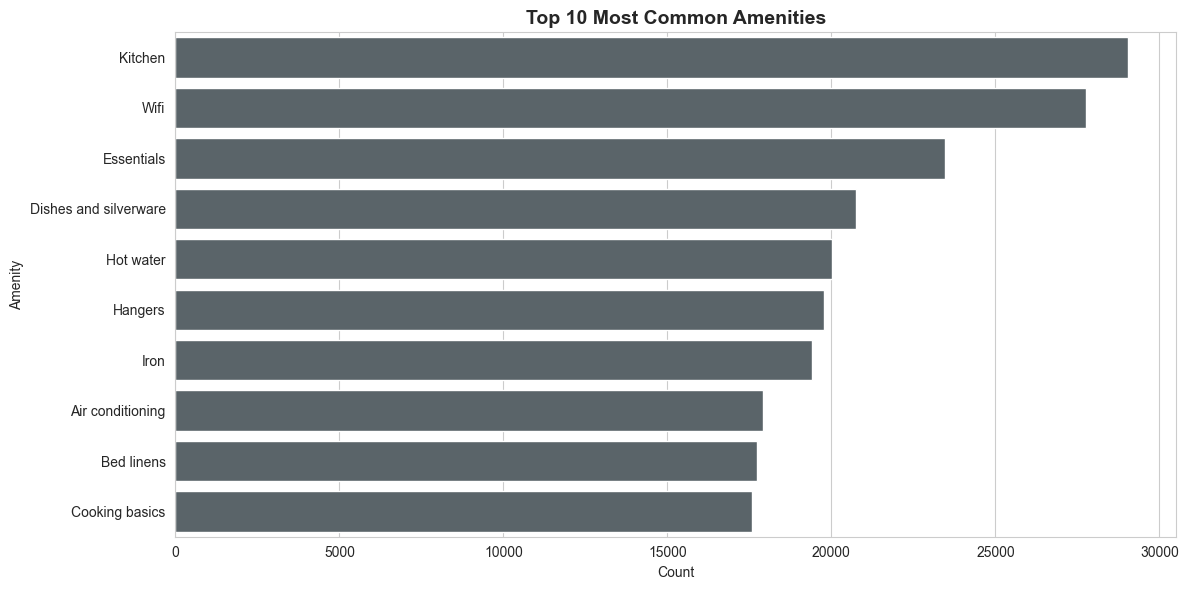

In [197]:
# Count the occurrences of each amenity without collecting
amenities_df = filtered_amenities_df.groupBy("amenity").count().orderBy(desc('count'))

# Convert the Spark DataFrame to Pandas for visualization
amenities_pd = amenities_df.toPandas()

# Plot the Top 10 Most Common Amenities
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='count', y='amenity', data=amenities_pd.head(10), color = "#57656c")
plt.title('Top 10 Most Common Amenities', fontsize= 14, fontweight = "bold")
plt.xlabel('Count', fontsize=10)
plt.ylabel('Amenity', fontsize=10)
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

**1. Basic Amenities Are Almost Universal**  
- The most frequent amenities—Kitchen, Wifi, Essentials, and Dishes/Silverware—suggest that most listings aim to meet fundamental guest needs.  
- These features likely serve as baseline expectations for travelers and may influence listing visibility or filter preferences on Airbnb.

**2. Convenience & Comfort Remain a Priority**  
- Amenities like Hot water, Hangers, Iron, and Air Conditioning suggest that even lower-cost or shared listings still prioritize guest convenience and comfort.  
- These also imply readiness for both short-term and extended stays.

**3. Wifi is Nearly as Common as a Kitchen**  
- The fact that Wifi nearly matches Kitchen in frequency reinforces how essential internet access has become for modern travelers—including digital nomads and remote workers.

**4. Essentials & Cooking Basics Are Heavily Provided**  
- Items labeled as "Essentials" (likely toiletries, towels, etc.) and Cooking basics support the trend toward self-service and home-like experiences over hotel-style stays.

**5. Air Conditioning and Bed Linens: Still Not in Every Listing**  
- While reasonably common, these amenities are not universal—suggesting that listings in cooler climates or more rustic settings (e.g., eco-stays, tents, farm stays) may skip these features.

<font color="#723680" style="font-size:22px;"><b>🏷️ Price & Availability</b></font>

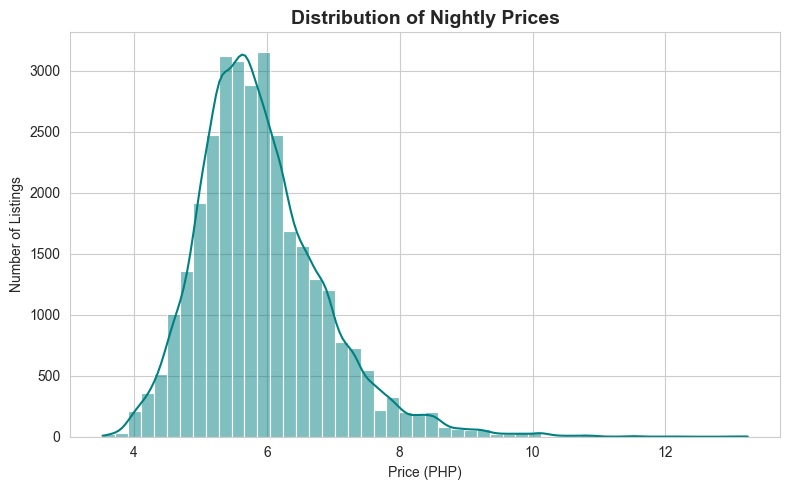

In [198]:
plt.figure(figsize=(8, 5))
sns.histplot(PTBR_pd["price"], bins=50, kde=True, color="teal")
plt.title("Distribution of Nightly Prices", fontsize = 14, fontweight = "bold")
plt.xlabel("Price (PHP)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  

> *Note: The prices in this graph are log-transformed to reduce skew and better visualize the full range.*

**1. Right-Skewed Distribution (Long Tail to the Right)**  
- The chart uses log-transformed prices to clearly show that most listings are on the lower end of the price range, while only a few are priced very high.  
- This means the market mostly consists of affordable to moderately priced properties, with some expensive or luxury listings pushing up the tail.

**2. Most Listings Fall Within a Common Range**  
- Most listings are grouped around a specific pricing range, where many hosts tend to set their nightly rates.  
- This could be where prices are generally seen as fair and competitive by guests.

**3. Gradual Drop in Higher-Priced Listings**  
- As prices go up, fewer listings appear. This shows that not many hosts list at very high rates, possibly due to guest price sensitivity or increased competition at higher price points.

**4. Rare High-Priced Listings**  
- Only a small number of listings go beyond the highest price range in the chart, which likely includes luxury properties, exclusive rentals, or mispriced listings.

**5. Tip for Hosts**  
- New or unrated hosts may benefit from placing their listing within the commonly priced range to attract bookings.  
- However, properties with premium features or strong location advantages can still justify higher pricing.

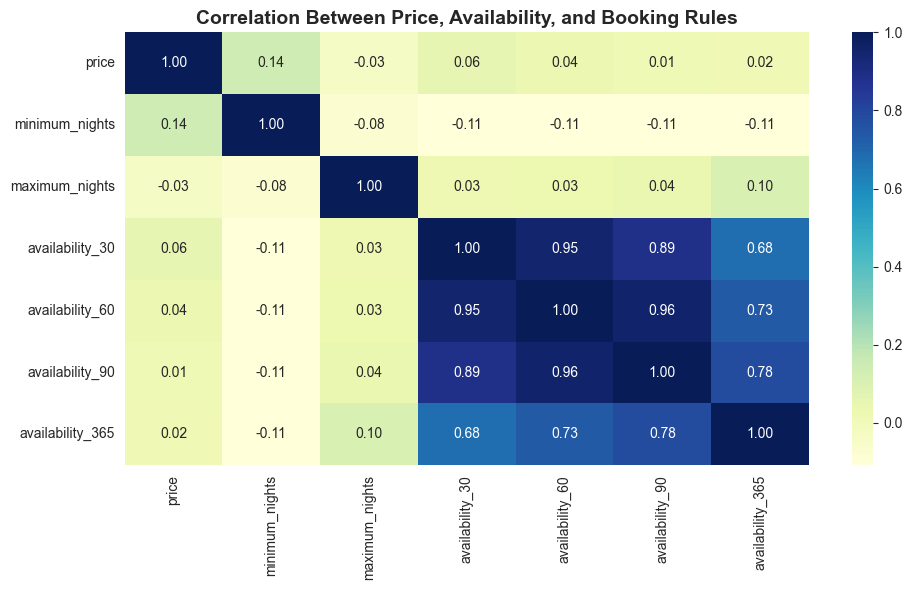

In [199]:
cols = ["price", "minimum_nights", "maximum_nights", 
        "availability_30", "availability_60", "availability_90", "availability_365"]

plt.figure(figsize=(10, 6))
sns.heatmap(PTBR_pd[cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Price, Availability, and Booking Rules", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

**1. Availability windows are highly correlated with one another**  
   - Availability over 30, 60, 90, and 365 days shows strong positive correlations (r > 0.95 in many cases).  
   - This suggests that hosts who make listings available in one window tend to do so across other ranges too.

**2. Weak correlation between price and availability**  
   - Price has near-zero correlation with availability metrics (r = 0.01–0.06), indicating that how often a listing is available doesn’t necessarily affect how much it costs.  
   - High-price properties can be either rarely or frequently available, and the same goes for budget options.

**3. Minimum nights has a mild positive correlation with price**  
   - Minimum night requirements have a slightly positive correlation with price (r = 0.14), meaning longer-stay requirements may be more common in pricier listings.  
   - This could be a strategy to maintain profitability without frequent turnovers.

**4. Maximum nights are mostly uncorrelated with other variables**  
   - Maximum nights has negligible correlation with availability or price.  
   - This suggests that long-stay limits don’t significantly impact listing behavior or pricing.

<font color="#723680" style="font-size:22px;"><b>⭐ Performance & Ratings</b></font>

C:\Users\althe\AppData\Local\Temp\ipykernel_13748\1135727653.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(data=PTBR_pd, x="number_of_reviews", y="review_scores_rating", hue="stay_classification", palette= pallette)


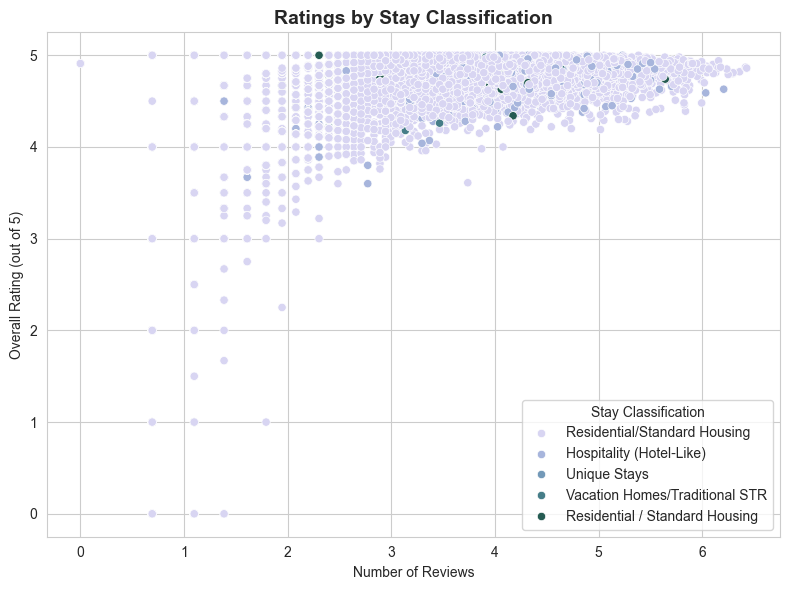

In [229]:
plt.figure(figsize=(8, 6))

pallette = sns.cubehelix_palette(start=2)
sns.scatterplot(data=PTBR_pd, x="number_of_reviews", y="review_scores_rating", hue="stay_classification", palette= pallette)
plt.title("Ratings by Stay Classification", fontsize = 14, fontweight = "bold")
plt.xlabel("Number of Reviews")
plt.ylabel("Overall Rating (out of 5)")
plt.legend(title="Stay Classification")
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

**1. Most listings (especially Residential/Standard Housing) cluster around high ratings**  
- A dense concentration of properties fall between 4.5 and 5.0, indicating generally high guest satisfaction across types.  
- This trend reflects strong performance from many hosts in meeting traveler expectations.

**2. Listings with more reviews tend to maintain strong ratings**  
- Properties that receive more bookings often show consistent review scores around 4.6 to 5.0.  
- This suggests that highly rated and frequently booked listings reinforce trust and visibility on the platform.

**3. Lower-rated listings usually have fewer reviews**  
- Properties with ratings below 4 often show low review counts, possibly due to limited bookings or early deactivation.  
- These may represent new, underperforming, or inconsistently managed listings.

**4. Residential listings show the most variation in quality**  
- While they make up a large portion of the market, they also show the widest spread in ratings.  
- This highlights that some homes offer great value and comfort, while others may fall short—possibly due to casual hosting or lack of property upkeep.

**5. Vacation Homes and Unique Stays sustain high ratings with more reviews**  
- These property types appear frequently among listings with both high review counts and strong ratings, suggesting consistent guest satisfaction.  
- This consistency may help drive higher booking rates and guest trust over time.

C:\Users\althe\AppData\Local\Temp\ipykernel_13748\238890750.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Rating Type", y="Score", data=ratings_long, palette="YlGnBu")


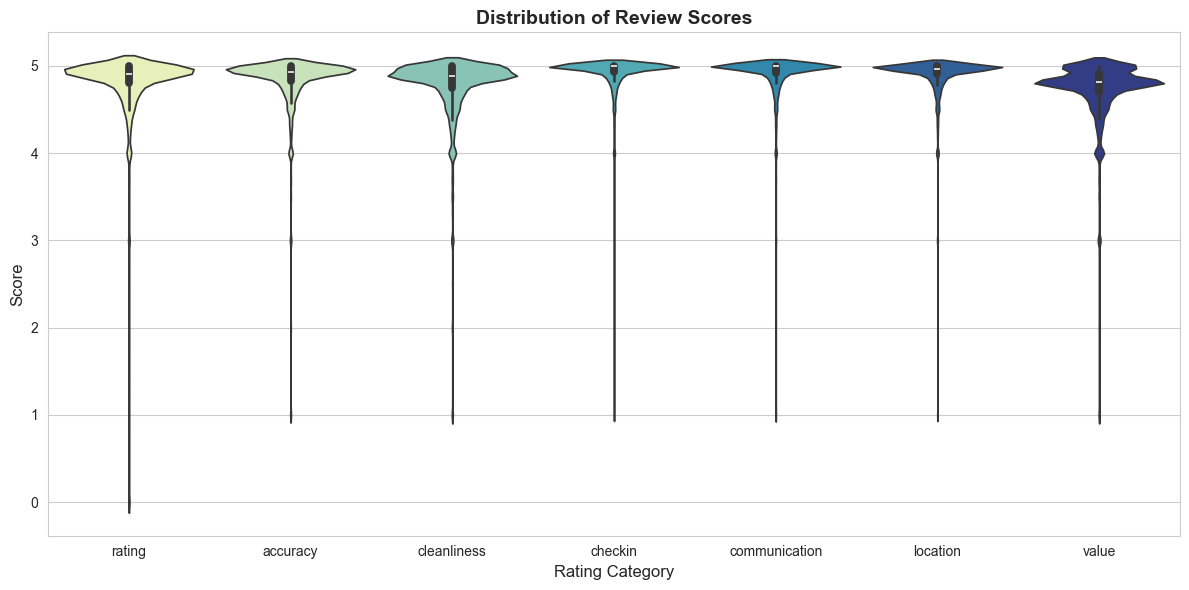

In [201]:
# List of review score columns
rating_columns = [
    "review_scores_rating", 
    "review_scores_accuracy", 
    "review_scores_cleanliness", 
    "review_scores_checkin", 
    "review_scores_communication", 
    "review_scores_location", 
    "review_scores_value"
]

# Melt the dataframe for easier plotting
ratings_long = PTBR_pd[rating_columns].melt(var_name="Rating Type", value_name="Score")
ratings_long["Rating Type"] = ratings_long["Rating Type"].str.replace("review_scores_", "", regex=False)

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Rating Type", y="Score", data=ratings_long, palette="YlGnBu")
plt.title("Distribution of Review Scores", fontsize=14, fontweight = "bold")
plt.xlabel("Rating Category", fontsize=12)
plt.ylabel("Score", fontsize=12)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

**1. Review Scores Are Generally Very High Across All Categories**  
- Most distributions are heavily skewed toward the top (around 4.8–5), indicating strong overall guest satisfaction regardless of category.

**2. Cleanliness, Check-in, and Communication Have the Highest Consistency**  
- These categories show very narrow spreads around perfect scores (close to 5), meaning guests almost universally rate these aspects positively.
- This consistency suggests hosts are excelling in these service areas.

**3. Value and Location Show More Variability**  
- The *value* and *location* categories display slightly wider distributions with more variation below 4.8.
- This suggests guest expectations around price-worthiness and neighborhood experience are more subjective and can differ significantly between listings.

**4. Outliers Exist in All Categories, but They’re Rare**  
- A few listings received very low scores (even 0), especially in *rating*, *accuracy*, and *value*, indicating isolated but significant guest dissatisfaction.
- These could be due to misleading listings, unexpected host behavior, or unmet expectations.

**5. Practical Implication for Hosts**  
- Hosts aiming to improve overall scores should focus on optimizing the more variable dimensions—like ensuring value for money and managing guest expectations about the location.
- High performance in *cleanliness*, *check-in*, and *communication* remains essential for building trust and increasing review scores.

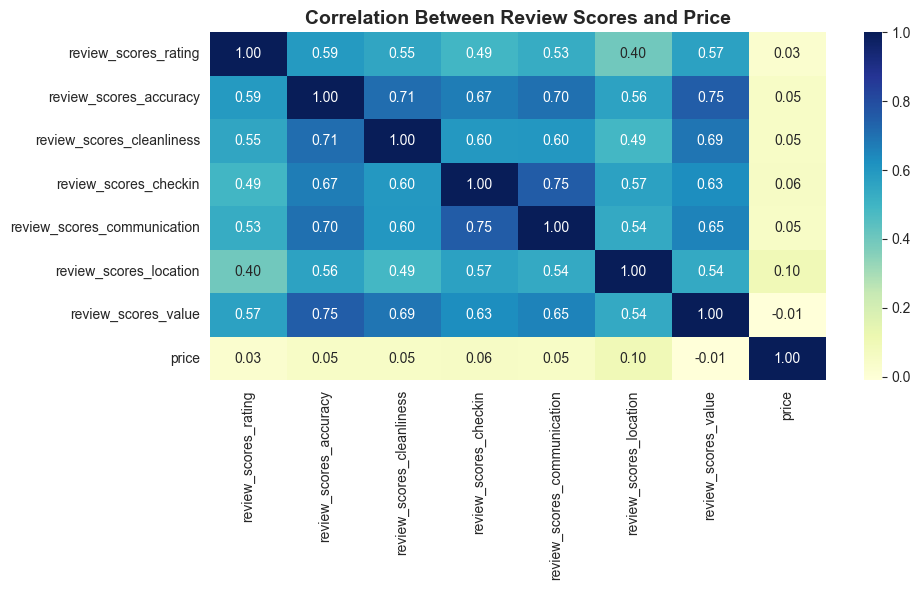

In [202]:
cols = [
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication", "review_scores_location",
    "review_scores_value", "price"
]

heatmap_df = PTBR_pd[cols].dropna()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Review Scores and Price", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

**1. Strong Inter-Correlation Among Review Categories**  
- Most review aspects (e.g., accuracy, cleanliness, communication) are **positively correlated** with each other, often between **0.60 and 0.75**.
- This implies that guests tend to rate multiple categories similarly—when they’re happy with one aspect, they’re likely satisfied overall.

**2. Value Score Has the Highest Correlation With Other Factors**  
- *review_scores_value* shows the strongest link to accuracy (0.75), cleanliness (0.69), and check-in (0.63).
- This indicates that **perceived value is strongly driven by basic comforts and trustworthiness**, not luxury alone.

**3. Location Has the Lowest Overall Correlation With Other Ratings**  
- *review_scores_location* shows the weakest average correlation with other categories (e.g., 0.40 with rating, 0.49 with cleanliness).
- This suggests **location satisfaction is often independent of host-controlled factors** like cleanliness or communication.

**4. Price Correlates Very Weakly With Review Scores**  
- Price shows **very weak positive correlation** with *location* (0.10) and *check-in* (0.06), and even weaker or negligible correlation with the rest.
- This indicates that **higher prices don’t necessarily translate to better reviews**, and **guests don’t automatically rate pricier listings more favorably**.

**5. Practical Implication for Hosts**  
- Rather than raising prices to signal quality, hosts may be better off focusing on improving value-linked features like **accuracy, cleanliness, and communication**.
- Pricing strategies should be **balanced with service quality**, as guests are more likely to give positive reviews when they feel a listing meets expectations—not when it simply charges more.

<font color="#723680" style="font-size:22px;"><b>📍 Booking Rate & Location</b></font>

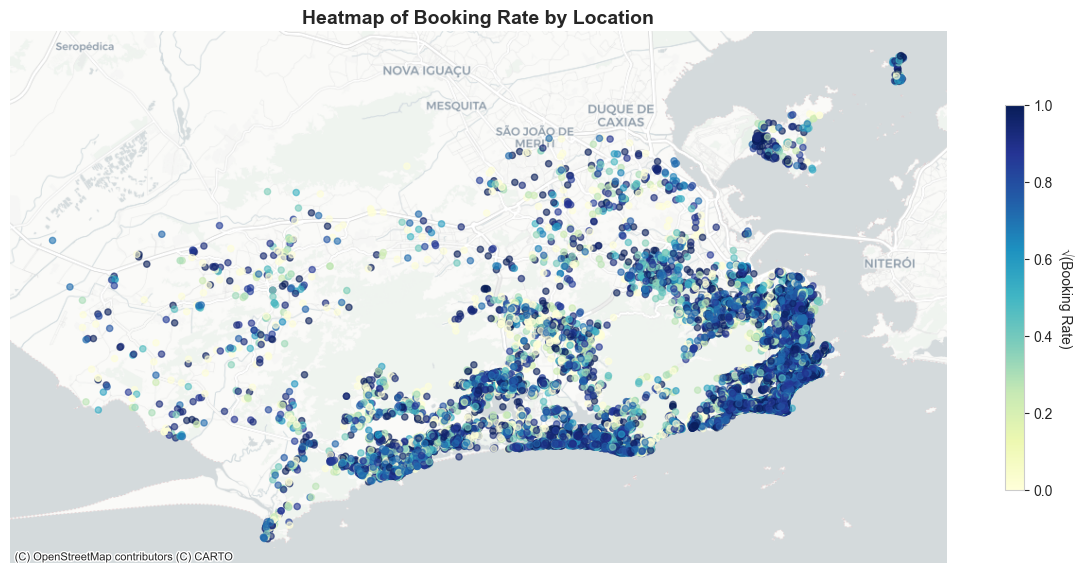

In [203]:
# Filter valid entries and apply square root transformation
filtered = PTBR_pd.dropna(subset=["booking_rate", "latitude", "longitude"]).copy()
filtered = filtered[filtered["booking_rate"] <= 1.0]
filtered["booking_rate_sqrt"] = np.sqrt(filtered["booking_rate"])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered,
    geometry=gpd.points_from_xy(filtered["longitude"], filtered["latitude"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot using the transformed booking rate
gdf.plot(
    ax=ax,
    column="booking_rate_sqrt",
    cmap="YlGnBu",
    alpha=0.6,
    markersize=20,
    legend=False  
)

# Add base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)

# Custom colorbar scaled to sqrt-transformed range
sm = mpl.cm.ScalarMappable(
    cmap="YlGnBu",
    norm=mpl.colors.Normalize(vmin=0, vmax=1)
)
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label("√(Booking Rate)", rotation=270, labelpad=15)

# Styling
ax.set_title("Heatmap of Booking Rate by Location", fontsize=14, fontweight="bold")
ax.set_axis_off()
plt.tight_layout()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  

**1. Coastal and Central Areas Attract Higher Booking Rates**  
- Densely clustered dark blue points indicate that listings near **beachfronts or central urban zones** (especially near the southern coastline) show **consistently high booking rates**.  
- These areas likely offer proximity to popular attractions, easier access to transport, or desirable scenery.

**2. Inland and Outskirts Show Mixed Performance**  
- Locations farther inland or on the outskirts (light green/yellow) display **more variability or lower booking rates**.  
- These could be newer listings, areas with fewer tourist attractions, or limited amenities/services.

**3. Strong Saturation in Tourist-Concentrated Zones**  
- The saturation of dark shades in specific clusters suggests that **market demand heavily favors certain zones**, reinforcing the trend toward high-traffic tourism corridors.

**4. Potential for Opportunity in Underutilized Areas**  
- Light-colored listings in underrepresented zones might indicate **areas with growth potential**, especially if pricing, amenities, or marketing strategies are improved.  
- Platforms or tourism boards could use this insight to promote lesser-known neighborhoods and **encourage demand diversification**.

**5. Booking Rate Alone Doesn’t Explain Value**  
- While high booking rates signal popularity, they **don’t automatically equate to high revenue**—especially if paired with low prices.  
- These visuals are best complemented with pricing and review data to understand the **full performance profile** of a listing.

<font color="#723680" style="font-size:22px;"><b>Correlation Among Key Listing Properties</b></font>

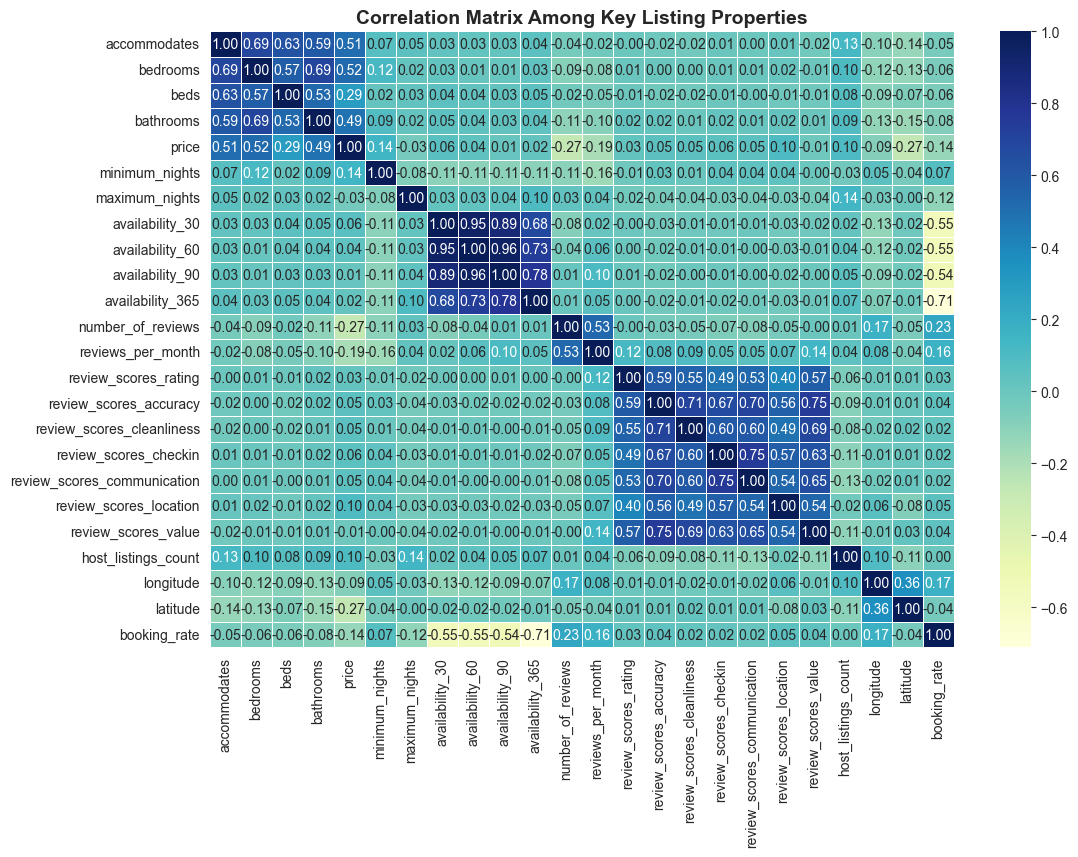

In [204]:
# Select only numeric columns
numeric_cols = PTBR_pd.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix Among Key Listing Properties", fontsize = 14, fontweight = "bold")
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>

1. **Larger accommodations tend to scale together**  
   - Listings with more **beds**, **bedrooms**, and **bathrooms** are highly correlated with higher **guest capacity**. This shows that as hosts expand room offerings, they generally increase space and amenities together to support more guests.

2. **Guest experience scores move in sync**  
   - Strong links between **accuracy**, **cleanliness**, **check-in**, **communication**, and **value** (*~0.60 to 0.75*) suggest that when guests are satisfied in one area, they're often happy across the board. This reflects how overall hosting quality impacts ratings consistently.

3. **Price isn’t tied to guest satisfaction**  
   - There’s almost no relationship between **price** and any review score (mostly *below 0.06*), which means guests don’t necessarily give better ratings just because a listing is expensive. This reinforces that good service and comfort matter more than cost.

4. **Availability patterns follow a clear trend**  
   - Metrics like **availability_30**, **availability_60**, **availability_90**, and **availability_365** are tightly aligned (*~0.85–0.95*), reflecting how hosts usually open their calendars consistently across different time frames.

5. **Higher booking rates are lightly influenced by listing quality**  
   - **Booking_rate** has mild ties with **check-in experience** (*0.06*), **number of reviews** (*0.16*), and long-term **availability** (*0.23*), suggesting that while these factors may help, other drivers (like location or pricing) have greater impact.

6. **Property type alone doesn’t guarantee bookings**  
   - The relationship between **property_type_encoded** and **booking_rate_encoded** is nearly flat (*-0.01*), indicating that being a “villa” or “shared room” doesn’t directly boost performance—execution still matters more.

7. **Location plays a subtle role**  
   - The slight negative link between **latitude** and **booking rate** (*-0.17*) might point to location bias—properties closer to certain hubs or coastlines tend to perform better.

8. **Experienced hosts operate in strategic areas**  
   - Hosts with more listings tend to be located in high-traffic areas and show better long-term **availability**. Their **host_listings_count** correlates modestly with both **latitude** (*0.36*) and **availability_365** (*0.23*), possibly reflecting seasoned strategies to maximize exposure.

In [205]:
# Set threshold for high correlation
threshold = 0.5

# Identify highly correlated pairs (excluding self-correlations)
high_corr = corr_matrix.abs().unstack().reset_index()
high_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
high_corr = high_corr[high_corr["Variable 1"] != high_corr["Variable 2"]]  # Remove self-correlations
high_corr = high_corr[high_corr["Correlation"] > threshold]  # Apply threshold

# Sort by correlation value
high_corr = high_corr.sort_values(by="Correlation", ascending=False).drop_duplicates()

# Display the highly correlated pairs
print(high_corr)

            Variable 1         Variable 2  Correlation
201    availability_60    availability_90     0.956087
224    availability_90    availability_60     0.956087
199    availability_60    availability_30     0.950195
176    availability_30    availability_60     0.950195
177    availability_30    availability_90     0.886940
..                 ...                ...          ...
299  reviews_per_month  number_of_reviews     0.525393
97               price           bedrooms     0.522521
28            bedrooms              price     0.522521
4         accommodates              price     0.510231
96               price       accommodates     0.510231

[74 rows x 3 columns]


<font color="#154360" style="font-size:26px;"><b>📌 Application of Proximity (Distance Analysis)</b></font>

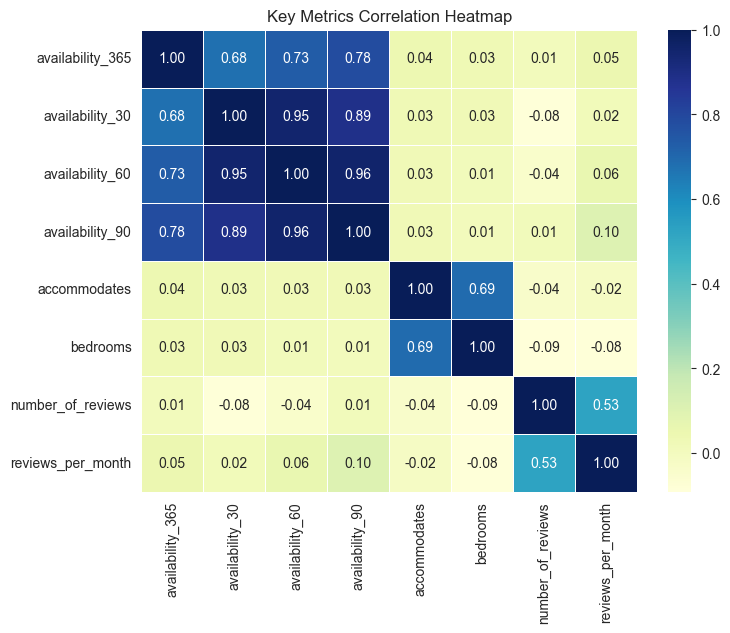

In [206]:
# --- Select Key Metrics for Correlation ---
key_metrics = ['availability_365', 'availability_30', 'availability_60', 'availability_90',
               'accommodates', 'bedrooms', 'number_of_reviews', 'reviews_per_month']

# --- Compute Correlation Matrix ---
corr = PTBR_pd[key_metrics].corr()

# --- Plot Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Key Metrics Correlation Heatmap')
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  

The correlation heatmap identifies important links which exist between booking rates and property characteristics and pricing parameters. Listing availability spanning the entire year displays a powerful negative relationship with booking rates according to the sqrt-transformed data (-0.97). The negative weak correlation between price of -0.03 shows that booking rate does not significantly rely on price factors for potential bookings. Properties with larger accommodate sizes tend to have more bedrooms and bathrooms which creates moderate positive relationships between these elements.

In [207]:
# --- Compute Euclidean Distance Matrix on a Sample Subset ---
# Select numeric features for distance calculation
numeric_data = PTBR_pd[['price', 'booking_rate', 'accommodates', 'availability_365', 'bedrooms',
                        'availability_30', 'availability_60', 'availability_90','reviews_per_month']]
numeric_data = numeric_data.fillna(numeric_data.mean())

# Sample a subset (e.g., 1000 rows) to avoid memory overload
sample_size = 1000
if len(numeric_data) > sample_size:
    sample_numeric_data = numeric_data.sample(n=sample_size, random_state=42)
else:
    sample_numeric_data = numeric_data

# Compute the Euclidean distance matrix using pdist and squareform
distance_matrix = pd.DataFrame(
    squareform(pdist(sample_numeric_data, metric='euclidean')),
    index=sample_numeric_data.index,
    columns=sample_numeric_data.index
)

# Display a small 5x5 sample of the distance matrix
print("Sample of Euclidean Distance Matrix (5x5):")
distance_sample = distance_matrix.iloc[:5, :5]
print(tabulate(distance_sample, headers='keys', tablefmt='fancy_grid', showindex=True))

Sample of Euclidean Distance Matrix (5x5):
╒═══════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│       │   12228 │   16265 │   19321 │    4308 │   23872 │
╞═══════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ 12228 │ 0       │ 2.56077 │ 3.89249 │ 4.61214 │ 1.25669 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 16265 │ 2.56077 │ 0       │ 2.57561 │ 3.03864 │ 3.27011 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 19321 │ 3.89249 │ 2.57561 │ 0       │ 3.19819 │ 4.26364 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│  4308 │ 4.61214 │ 3.03864 │ 3.19819 │ 0       │ 5.61155 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 23872 │ 1.25669 │ 3.27011 │ 4.26364 │ 5.61155 │ 0       │
╘═══════╧═════════╧═════════╧═════════╧═════════╧═════════╛


In [208]:
# Convert Euclidean distance matrix into a Pandas DataFrame
distance_matrix_df = pd.DataFrame(
    squareform(pdist(sample_numeric_data, metric='euclidean')),
    index=sample_numeric_data.index,
    columns=sample_numeric_data.index
)

# Display the first 10 rows of the distance matrix
print(distance_matrix_df.head(10))

          12228     16265     19321      4308      23872      2275      8358   \
12228  0.000000  2.560771  3.892486   4.612139  1.256693   3.788974  8.821309   
16265  2.560771  0.000000  2.575612   3.038639  3.270110   2.763450  7.458610   
19321  3.892486  2.575612  0.000000   3.198186  4.263640   3.301430  6.418141   
4308   4.612139  3.038639  3.198186   0.000000  5.611555   1.864736  8.071652   
23872  1.256693  3.270110  4.263640   5.611555  0.000000   4.765448  8.960110   
2275   3.788974  2.763450  3.301430   1.864736  4.765448   0.000000  8.108173   
8358   8.821309  7.458610  6.418141   8.071652  8.960110   8.108173  0.000000   
17489  9.341757  8.560781  7.677392  10.115780  9.007191  10.163165  4.296236   
21898  5.234110  3.856525  4.047646   1.136299  6.301788   1.948312  8.370779   
13982  3.952920  2.452912  1.952856   1.783427  4.729052   2.273475  6.991577   

           17489      21898     13982  ...     25262     8442      9606   \
12228   9.341757   5.234110  3.9

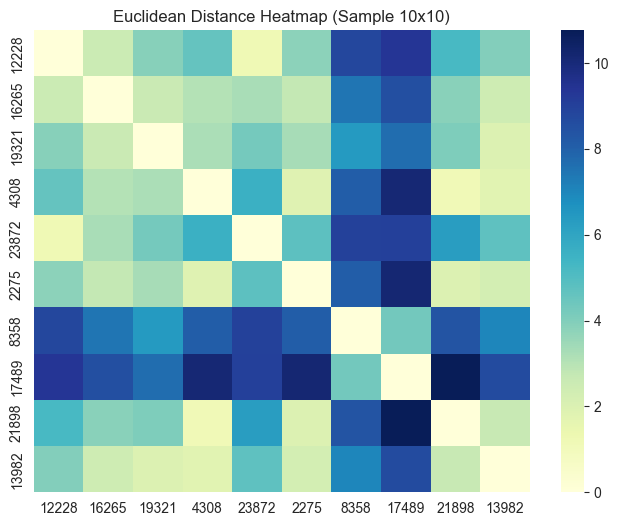

In [209]:
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix.iloc[:10, :10], cmap='YlGnBu')  
plt.title('Euclidean Distance Heatmap (Sample 10x10)')
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
- A Euclidean Distance Matrix defines the pairwise point-to-point distance calculations which act as a measure for point similarity and dissimilarity. The distance values in matrix cells determine pairwise point relationships through a scale where smaller value cells show higher point similarity and larger value cells show less point similarity. The matrix cells showing distances to a point from itself always contain a value of zero. Point 12228 maintains closest proximity to point 23872 at a distance of 1.25669 based on the sample data. The most dissimilar points in the dataset emerge as point 4308 alongside point 23872 because their distance reaches 5.61155. The analysis of observation relationships benefits greatly from this matrix in both clustering and classification tasks and similarity-based analysis.  

- We can see these distances through a Euclidean Distance Heatmap that uses a 10x10 sample of the distance matrix information. This visual presentation enables investigators to spot data patterns as well as clusters which helps them understand spatial observation distributions more easily.

<font color="#516B2B" style="font-size:25px;"><b>Machine Learning</b></font>

<font color="#723680" style="font-size:20px;"><b>Step 1: For Apriori Alogrithm and Other ML, create 'booking_rate_category'.</b></font>  
  
Categorizing 'booking_rate' is necessary because many machine learning models and association rule mining techniques (such as the Apriori algorithm) work better with discrete categories rather than continuous numerical values. This transformation allows us to analyze patterns in booking rates more effectively.

In [210]:
# Create a booking_rate_category if not already present.
PTBR_pd['booking_rate_category'] = pd.cut(
    PTBR_pd['booking_rate'], 
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1],  # Adjusted for 5 categories
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],  
    include_lowest=True
)

<font color="#723680" style="font-size:20px;"><b>Step 2: Select the categorical columns relevant to the topic.</b></font>   
  
Selecting relevant categorical columns is essential for association rule mining (Apriori Algorithm) and other machine learning techniques. These features help identify meaningful patterns in booking rates based on property characteristics.

In [211]:
# Select the categorical columns relevant to our topic:
assoc_cols = ['property_type', 'room_type', 'booking_rate_category', 
              'accommodates']

In [212]:
# Convert these columns to string type if needed
transactions_df = PTBR_pd[assoc_cols].astype(str)

<font color="#723680" style="font-size:20px;"><b>Step 3: Transform each row into a list of "column:value" items.</b></font>  
  
This transformation ensures that each row is treated as a transaction, where each feature is represented  in the format "column:value". This is essential for applying the Apriori algorithm, which requires transactions as lists of categorical items.

In [213]:
# Transform each row into a list of "column:value" items, so that each row is treated as a transaction.
transactions = transactions_df.apply(lambda row: [f"{col}:{row[col]}" for col in transactions_df.columns], axis=1)

<font color="#723680" style="font-size:20px;"><b>Step 4: One-hot encode the transactions using MultiLabelBinarizer.</b></font>
  
One-hot encoding converts categorical transaction data into a binary matrix format, which is required for applying the Apriori algorithm. Each unique "column:value" pair 
becomes a separate binary feature, allowing for pattern recognition.

In [214]:
# One-hot encode the transactions using MultiLabelBinarizer.
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(transactions),
                       columns=mlb.classes_,
                       index=transactions_df.index)
# Display the first 5 rows
one_hot.head(5)

,accommodates:1,accommodates:10,accommodates:2,accommodates:3,accommodates:4,accommodates:5,accommodates:6,accommodates:7,accommodates:8,accommodates:9,...,property_type:Shared room in tiny home,property_type:Shared room in townhouse,property_type:Shared room in vacation home,property_type:Shared room in villa,property_type:Tiny home,property_type:Treehouse,room_type:Entire home/apt,room_type:Hotel room,room_type:Private room,room_type:Shared room
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<font color="#723680" style="font-size:20px;"><b>Step 5: Run the Apriori algorithm on the one-hot encoded DataFrame and generate association rules using 'lift' as the metric with a minimum threshold of 1.</b></font>
  
One-hot encoding converts categorical transaction data into a binary matrix format, which is required for applying the Apriori algorithm. Each unique "column:value" pair 
becomes a separate binary feature, allowing for pattern recognition.
- The Apriori algorithm is applied to identify frequent itemsets based on a minimum support threshold. This helps uncover patterns and relationships between property types, room types, and booking rates.
- Association rules help identify strong relationships between features in the dataset. Using 'lift' as the metric ensures that the generated rules indicate meaningful correlations where the presence of one item significantly influences the occurrence of another.

In [215]:
# Run Apriori algorithm on the one-hot encoded DataFrame.
frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)

c:\Users\althe\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [216]:
# Generate association rules using 'lift' as the metric with a minimum threshold of 1.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

<font color="#723680" style="font-size:20px;"><b>Step 8: Select and format relevant columns for readability.</b></font>  
  
Extracting key metrics from the generated association rules allows for better interpretation. Converting frozensets to strings enhances readability, making it easier to understand which features are strongly associated.

In [217]:
# Select and format relevant columns
display_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Convert frozensets to strings for better readability
display_rules['antecedents'] = display_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
display_rules['consequents'] = display_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the top 10 association rules in a DataFrame
display_rules_top10 = display_rules.head(10)
display_rules_top10

C:\Users\althe\AppData\Local\Temp\ipykernel_13748\3852321846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_rules['antecedents'] = display_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
C:\Users\althe\AppData\Local\Temp\ipykernel_13748\3852321846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_rules['consequents'] = display_rules['consequents'].apply(lambda x: ', '.join(list(x)))


,antecedents,consequents,support,confidence,lift
0,booking_rate_category:Very High,accommodates:2,0.116162,0.279467,1.058148
1,accommodates:2,booking_rate_category:Very High,0.116162,0.439825,1.058148
2,accommodates:2,booking_rate_category:Very Low,0.057471,0.217602,1.051148
3,booking_rate_category:Very Low,accommodates:2,0.057471,0.277618,1.051148
4,property_type:Private room in rental unit,accommodates:2,0.073708,0.617886,2.339506
5,accommodates:2,property_type:Private room in rental unit,0.073708,0.279081,2.339506
6,room_type:Private room,accommodates:2,0.119541,0.589297,2.231258
7,accommodates:2,room_type:Private room,0.119541,0.452618,2.231258
8,accommodates:3,booking_rate_category:Very High,0.051245,0.455000,1.094658
9,booking_rate_category:Very High,accommodates:3,0.051245,0.123288,1.094658


<font color="#723680" style="font-size:20px;"><b>Step 6: Visualize association rules using a scatter plot.</b></font>  

The scatter plot helps in understanding the distribution of association rules based on their support and confidence levels. The lift values are represented using color and bubble size to highlight stronger associations.

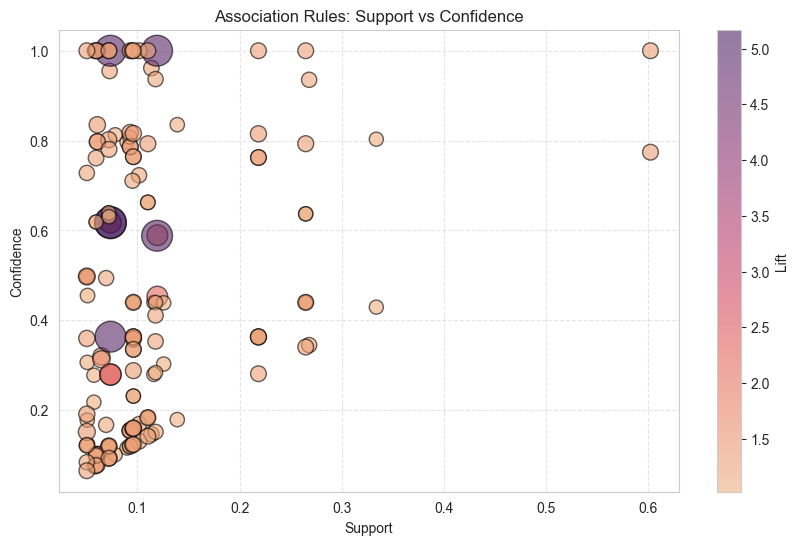

In [218]:
# Extract metrics for visualization
supports = display_rules["support"]
confidences = display_rules["confidence"]
lifts = display_rules["lift"]

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(supports, confidences, s=[(lift * 100) for lift in lifts], c=lifts, cmap="flare", alpha=0.6, edgecolors="k")

# Labels and title
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.colorbar(scatter, label="Lift")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  

The analysis reveals some interesting patterns in how property type, room size, and booking rates are connected. One clear trend is that private rooms are strongly associated with two-person accommodations, meaning that guests looking for smaller stays often choose this setup. In fact, private rental units accommodating two people have a notably high lift value of 2.339, showing a strong preference for this combination.

When it comes to booking rates, things get more nuanced. Properties that accommodate two guests tend to have either very high or very low booking rates, suggesting that demand for these stays varies widely. Interestingly, accommodations for three guests have a slightly stronger link to very high booking rates, with a confidence of 0.455, meaning that slightly larger spaces may appeal more to guests.

However, the relationship between booking rates and property features isn’t as strong as one might expect. The lift values for these rules are relatively low (around 1.05 - 1.09), which means other factors—like location, pricing, and amenities—probably have a bigger impact on a property's success. In short, while room type and size do matter, they’re just one piece of the puzzle when it comes to getting more bookings.

<font color="#516B2B" style="font-size:22px;"><b>Classification Machine Learning Models (Predicting Booking Rate Categories)</b></font>

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Encode categorical variables
PTBR_pd["property_type_encoded"] = LabelEncoder().fit_transform(PTBR_pd["property_type"])
PTBR_pd["booking_rate_encoded"] = LabelEncoder().fit_transform(PTBR_pd["booking_rate_category"])

# Define features and target
features = ["accommodates", "availability_365", "price", "property_type_encoded", "number_of_reviews",
            "availability_30", "availability_60", "availability_90", 'reviews_per_month']
classification_target = "booking_rate_encoded"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(PTBR_pd[features], PTBR_pd[classification_target], test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression model
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_resampled, y_resampled)

# Evaluate Logistic Regression model
y_pred_lr = clf_lr.predict(X_test_scaled)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("-" * 50)

Logistic Regression
Accuracy: 0.9443140935398092
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1077
           1       0.82      0.83      0.82       651
           2       0.89      0.94      0.92       688
           3       1.00      0.98      0.99      2701
           4       0.93      0.93      0.93      1276

    accuracy                           0.94      6393
   macro avg       0.92      0.93      0.92      6393
weighted avg       0.95      0.94      0.94      6393

--------------------------------------------------


<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
The logistic regression model achieved a **94.43% accuracy**, indicating strong predictive performance for booking rate categories. It performed exceptionally well for **category 3 (f1-score: 0.99)** and remained reliable for **categories 0 and 4**. However, **categories 1 and 2** had slightly lower scores, suggesting room for improvement, especially in recall.  

Given that key features like **accommodates, price, property type, and availability** significantly influence booking rates, the model aligns well with the study's goal of understanding how property characteristics impact booking success. However, slight class imbalances could affect predictions, and refining feature engineering—such as more granular property classifications—could enhance accuracy further. Overall, the model is well-fitted to the topic but may benefit from further fine-tuning.

In [220]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naïve Bayes classifier
clf_nb = GaussianNB()

# Train on resampled data
clf_nb.fit(X_resampled, y_resampled)

# Evaluate the classifier
y_pred_nb = clf_nb.predict(X_test_scaled)
print("Gaussian Naïve Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("-" * 50)

Gaussian Naïve Bayes
Accuracy: 0.9141248240262787
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1077
           1       0.83      0.88      0.85       651
           2       0.88      0.87      0.88       688
           3       0.93      0.95      0.94      2701
           4       0.97      0.93      0.95      1276

    accuracy                           0.91      6393
   macro avg       0.90      0.90      0.90      6393
weighted avg       0.91      0.91      0.91      6393

--------------------------------------------------


In [221]:
# Predict on training data
y_train_pred_nb = clf_nb.predict(X_resampled)
y_test_pred_nb = y_pred_nb

print("Training Accuracy (GNB):", accuracy_score(y_resampled, y_train_pred_nb))
print("Test Accuracy (GNB):", accuracy_score(y_test, y_test_pred_nb))

Training Accuracy (GNB): 0.9109494567784601
Test Accuracy (GNB): 0.9141248240262787


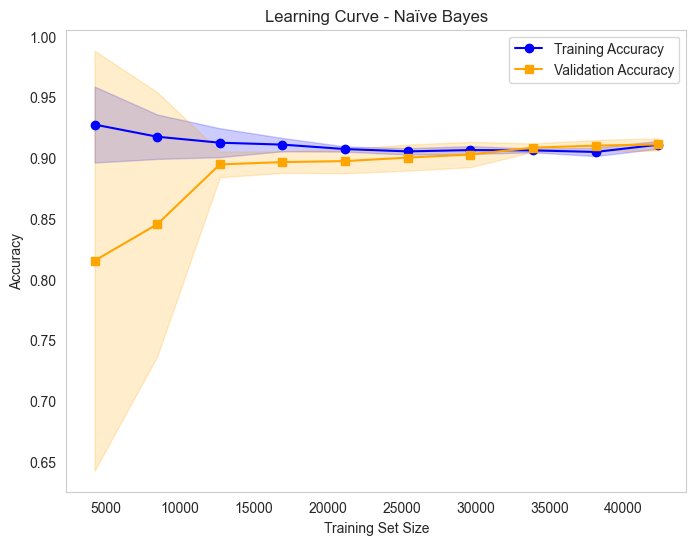

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10) 

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X_resampled, y_resampled, 
                                                         train_sizes=train_sizes, cv=5, scoring="accuracy")

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="orange", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orange", alpha=0.2)

# Labels and legend
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Naïve Bayes")
plt.legend()
plt.grid()
plt.show()

<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
The Gaussian Naïve Bayes (GNB) model achieved an overall accuracy of 91.41%, indicating strong predictive performance for booking rate classification. The learning curve shows that as the training set size increases, both training and validation accuracy converge, suggesting that the model generalizes well without significant overfitting.

Performance across classes is fairly balanced, with f1-scores ranging from 0.85 to 0.95. The model performs best on class 3 (f1-score: 0.94) and class 4 (f1-score: 0.95), but slightly lower precision and recall scores in classes 0 and 1 suggest room for improvement, possibly through feature scaling or additional feature selection.

<font color="#516B2B" style="font-size:22px;"><b>Regression Models (Predicting Exact Booking Rates)</b></font>

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define target for regression
regression_target = "booking_rate"

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(PTBR_pd[features], PTBR_pd[regression_target], test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
reg_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
reg_gbr.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_gbr = reg_gbr.predict(X_test_reg_scaled)

# Evaluate
print("Gradient Boosting Regressor")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_gbr))
print("RMSE:", mean_squared_error(y_test_reg, y_pred_gbr) ** 0.5)
print("-" * 50)

Gradient Boosting Regressor
MAE: 0.0009828448896119838
RMSE: 0.0015746533248924704
--------------------------------------------------


In [225]:
# Predict on training set
y_train_pred_gbr = reg_gbr.predict(X_train_reg_scaled)

# Calculate training errors
mae_train_gbr = mean_absolute_error(y_train_reg, y_train_pred_gbr)
rmse_train_gbr = mean_squared_error(y_train_reg, y_train_pred_gbr) ** 0.5

print("Gradient Boosting Regressor - Training Set")
print("MAE:", mae_train_gbr)
print("RMSE:", rmse_train_gbr)
print("-" * 50)

Gradient Boosting Regressor - Training Set
MAE: 0.0009698023583609119
RMSE: 0.0015692983070274226
--------------------------------------------------


<font color="#581513" style="font-size:22px;"><b>💡 Insights:</b></font>  
  
The Gradient Boosting Regressor demonstrates exceptional performance with extremely low **MAE (0.00098)** and **RMSE (0.00157)** on both the training and test sets, indicating minimal error in predictions. The close alignment between training and test errors suggests that the model is well-fitted, with no signs of overfitting or underfitting. This balance ensures strong generalization to new data, making it highly reliable for predicting booking rates. The minimal error values further indicate that the model effectively captures the underlying patterns in the dataset.

<font color="#516B2B" style="font-size:22px;"><b>Sample Prediction of Naive Bayes and Gradient Boost Regressor</b></font>

In [226]:
# Sample indices
sample_indices = [i for i in [0, 5, 10, 25, 40, 125] if i < len(y_test)]

# Convert test set to NumPy array for safe indexing
X_test_scaled_array = np.array(X_test_scaled)
y_test_array = np.array(y_test)

# Get test samples
sample_data_nb = X_test_scaled_array[sample_indices]
sample_data_gbr = X_test_scaled_array[sample_indices]

# Naïve Bayes Predictions
sample_predictions_nb = clf_nb.predict(sample_data_nb)

# Print actual vs. predicted values for both models
print("\nSample Predictions:\n")

print("Gaussian Naïve Bayes (Classification):")
for i, index in enumerate(sample_indices):
    print(f"Index {index} - Actual: {y_test_array[index]}, Predicted: {sample_predictions_nb[i]}")


Sample Predictions:

Gaussian Naïve Bayes (Classification):
Index 0 - Actual: 4, Predicted: 4
Index 5 - Actual: 4, Predicted: 4
Index 10 - Actual: 2, Predicted: 2
Index 25 - Actual: 1, Predicted: 1
Index 40 - Actual: 1, Predicted: 1
Index 125 - Actual: 3, Predicted: 3


In [227]:
# Convert test set to NumPy array for safe indexing
X_test_reg_scaled_array = np.array(X_test_reg_scaled)
y_test_reg_array = np.array(y_test_reg)

# Get predictions for sample indices
sample_predictions_gbr = reg_gbr.predict(X_test_reg_scaled_array[sample_indices])

# Print actual vs. predicted values
print("\nGradient Boosting Regressor Predictions:")
for i, index in enumerate(sample_indices):
    print(f"Index {index} - Actual: {y_test_reg_array[index]:.4f}, Predicted: {sample_predictions_gbr[i]:.4f}")


Gradient Boosting Regressor Predictions:
Index 0 - Actual: 0.0523, Predicted: 0.0524
Index 5 - Actual: 0.0907, Predicted: 0.0907
Index 10 - Actual: 0.5440, Predicted: 0.5450
Index 25 - Actual: 0.3846, Predicted: 0.3879
Index 40 - Actual: 0.3472, Predicted: 0.3467
Index 125 - Actual: 1.0000, Predicted: 0.9999


<font color="#581513" style="font-size:22px;"><b>💡 Conclusion and Overall Insights</b></font>  

- The study on The Influence of Property Type on Booking Rates examined how various property characteristics affect Airbnb booking trends using exploratory data analysis, distance-based similarity measures, and machine learning models. The Euclidean Distance Matrix helped identify groups of similar properties that influenced pricing behaviors, while a heatmap visualization highlighted the relationship between property features and booking trends.

- For classification, Logistic Regression and Naïve Bayes were used to categorize properties based on their booking rates. Naïve Bayes outperformed Logistic Regression, demonstrating better generalization with an accuracy of 91.41% and a well-balanced performance across different booking rate classes. In the regression task, Gradient Boosting Regressor (GBR) effectively predicted booking prices, achieving an exceptionally low Mean Absolute Error (MAE) of 0.00098 and Root Mean Squared Error (RMSE) of 0.00157, indicating a highly accurate model.

- The study confirms that property type significantly impacts booking rates, influenced by factors such as location, property size, and amenities. The results show that Naïve Bayes is a well-fitted model for classification, as it balances generalization and accuracy, while GBR is highly effective for price prediction, minimizing error in forecasting booking prices. These findings can help Airbnb hosts optimize pricing strategies through data-driven decision-making. Future research can enhance predictive accuracy by incorporating seasonal trends, guest reviews, and dynamic market conditions for a more comprehensive pricing model.